In [1]:
from __future__ import print_function

%matplotlib inline
%config InlineBackend.figure_format = "png2x"
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# SkyFlux

The `SkyFlux` object included in `coronagraph` uses the ESO SkyCalc Command Line Interface to retrieve a model of the flux due to Earth's atmosphere. A variety of parameters can be specified to obtain the flux of the sky.

In [3]:
import coronagraph as cg
print(cg.__version__)

1.01


Let's take a look at the parameters we can change in `SkyFlux`. First we instantiate a SkyFlux object and list its default parameters.

In [4]:
skyflux = cg.SkyFlux()
print(skyflux)

Sky Flux: 
---------
- Airmass : 1.0
- PWV Mode : pwv
- Season  : 0
- Time of Night  : 0 
- Precipitable Water Vapor (PWV) [mm]  : 3.5 
- Monthly Averaged Solar Flux [sfu=0.01 MJy]  : 130.0 
- Include Scattered Moonlight?  : Y 
- Separation of Sun and Moon as seen from Earth [deg] : 90.0 
- Separation of Moon and target [deg]  : 45.0 
- Moon altitude over horizon  : 45.0 
- Moon-Earth distance (mean=1)  : 1.0 
- Include scattered starlight?  : Y 
- Include zodiacal light?  : Y 
- Heliocentric ecliptic longitude [deg]  : 135.0 
- Ecliptic latitude [deg]  : 90.0 
- Include molecular emission of lower atmosphere?  : Y 
- Include molecular emission of upper atmosphere?  : Y 
- Include upper airglow continuum?  : Y 
- Include instrumental thermal radiation?  : N 
- Instrumental temperature 1  : 0.0 
- Instrumental emmisivity 1  : 0.0 
- Instrumental temperature 2  : 0.0 
- Instrumental emmisivity 2  : 0.0 
- Instrumental temperature 3  : 0.0 
- Instrumental emmisivity 3  : 0.0 
- Calculatio

We must first call `run_skycalc` to load the values for flux and wavelength. This step calls the `skycalc_cli` command and requires an internet connection to download the data. 

In [5]:
skyflux.run_skycalc('./testing.fits')

RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./testing.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './testing.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


(<Figure size 2000x1600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1bfe8240>)

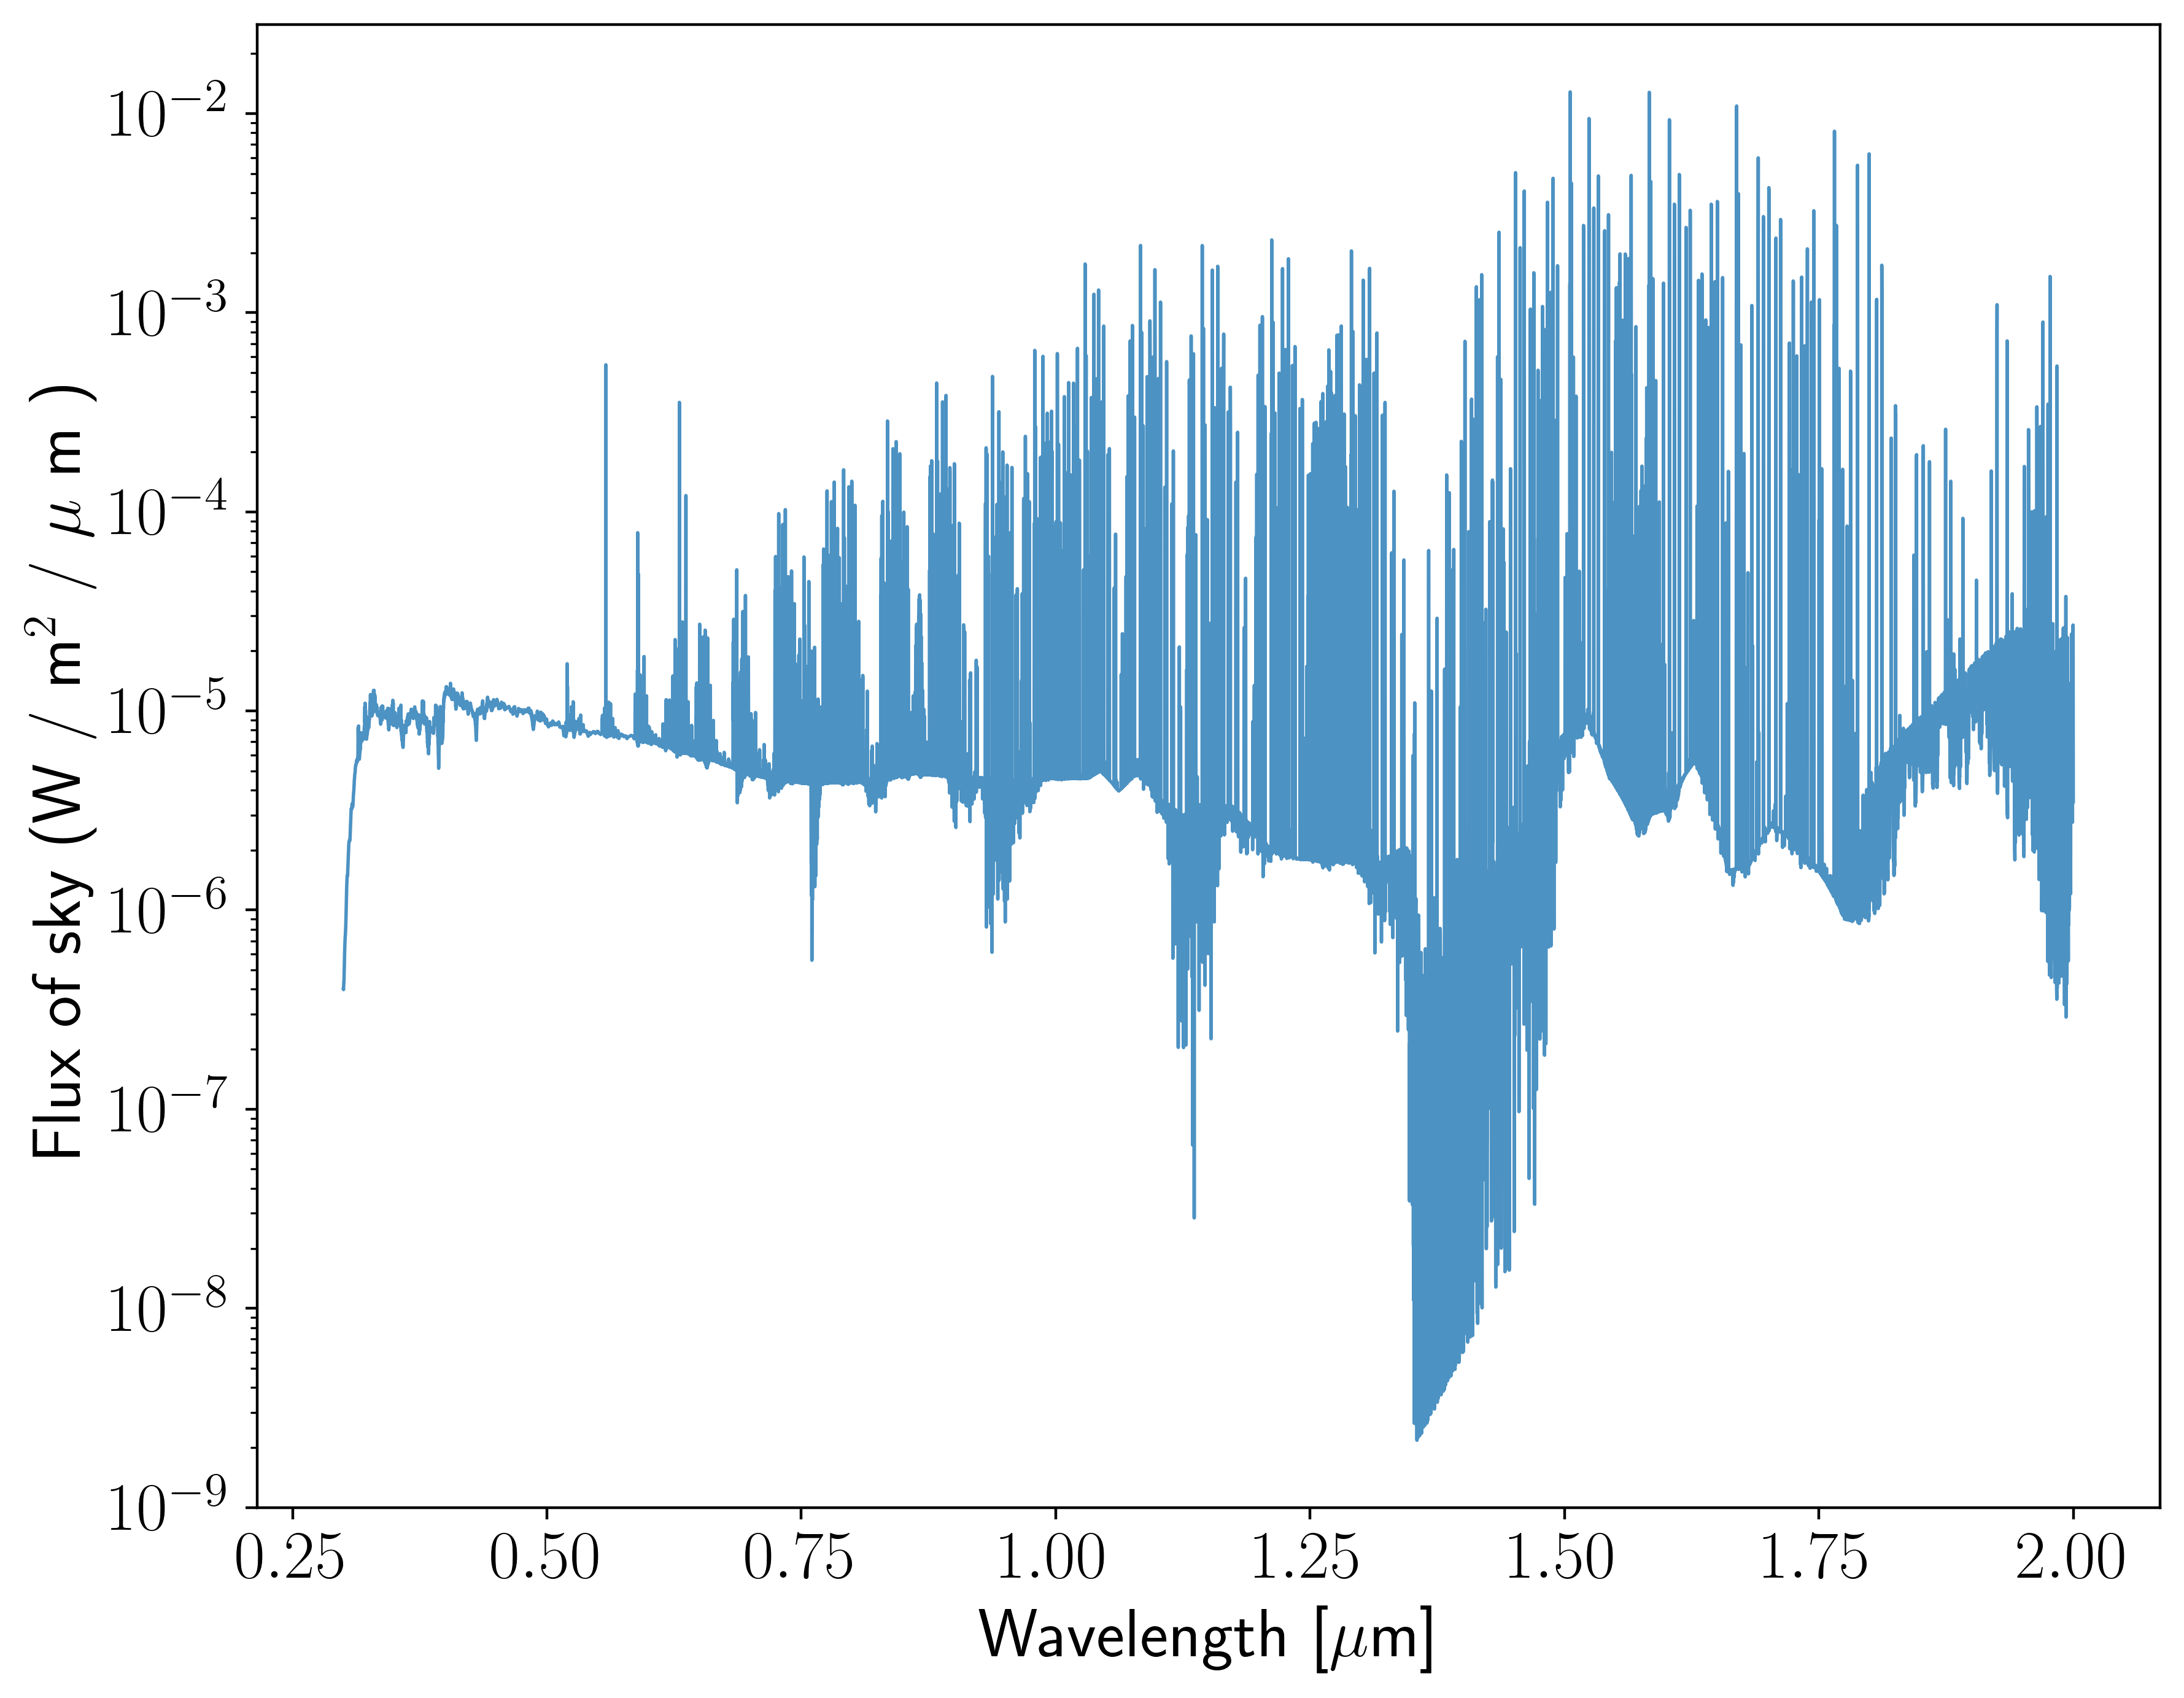

In [6]:
skyflux.plot_skyflux()

Now that we know SkyFlux is working, we can begin to explore how the various parameters affect the flux from the sky. 

## Resolution
`wgrid_mode` = `"fixed_spectral_resolution"`

`wres`

Let's start with one of the simpler parameters: Resolution


Spectral resolution 100000
Specified output file already exists. Not re-running SkyCalc.

Spectral resolution 10000
Specified output file already exists. Not re-running SkyCalc.

Spectral resolution 1000
Specified output file already exists. Not re-running SkyCalc.

Spectral resolution 100
Specified output file already exists. Not re-running SkyCalc.

Spectral resolution 1
Specified output file already exists. Not re-running SkyCalc.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


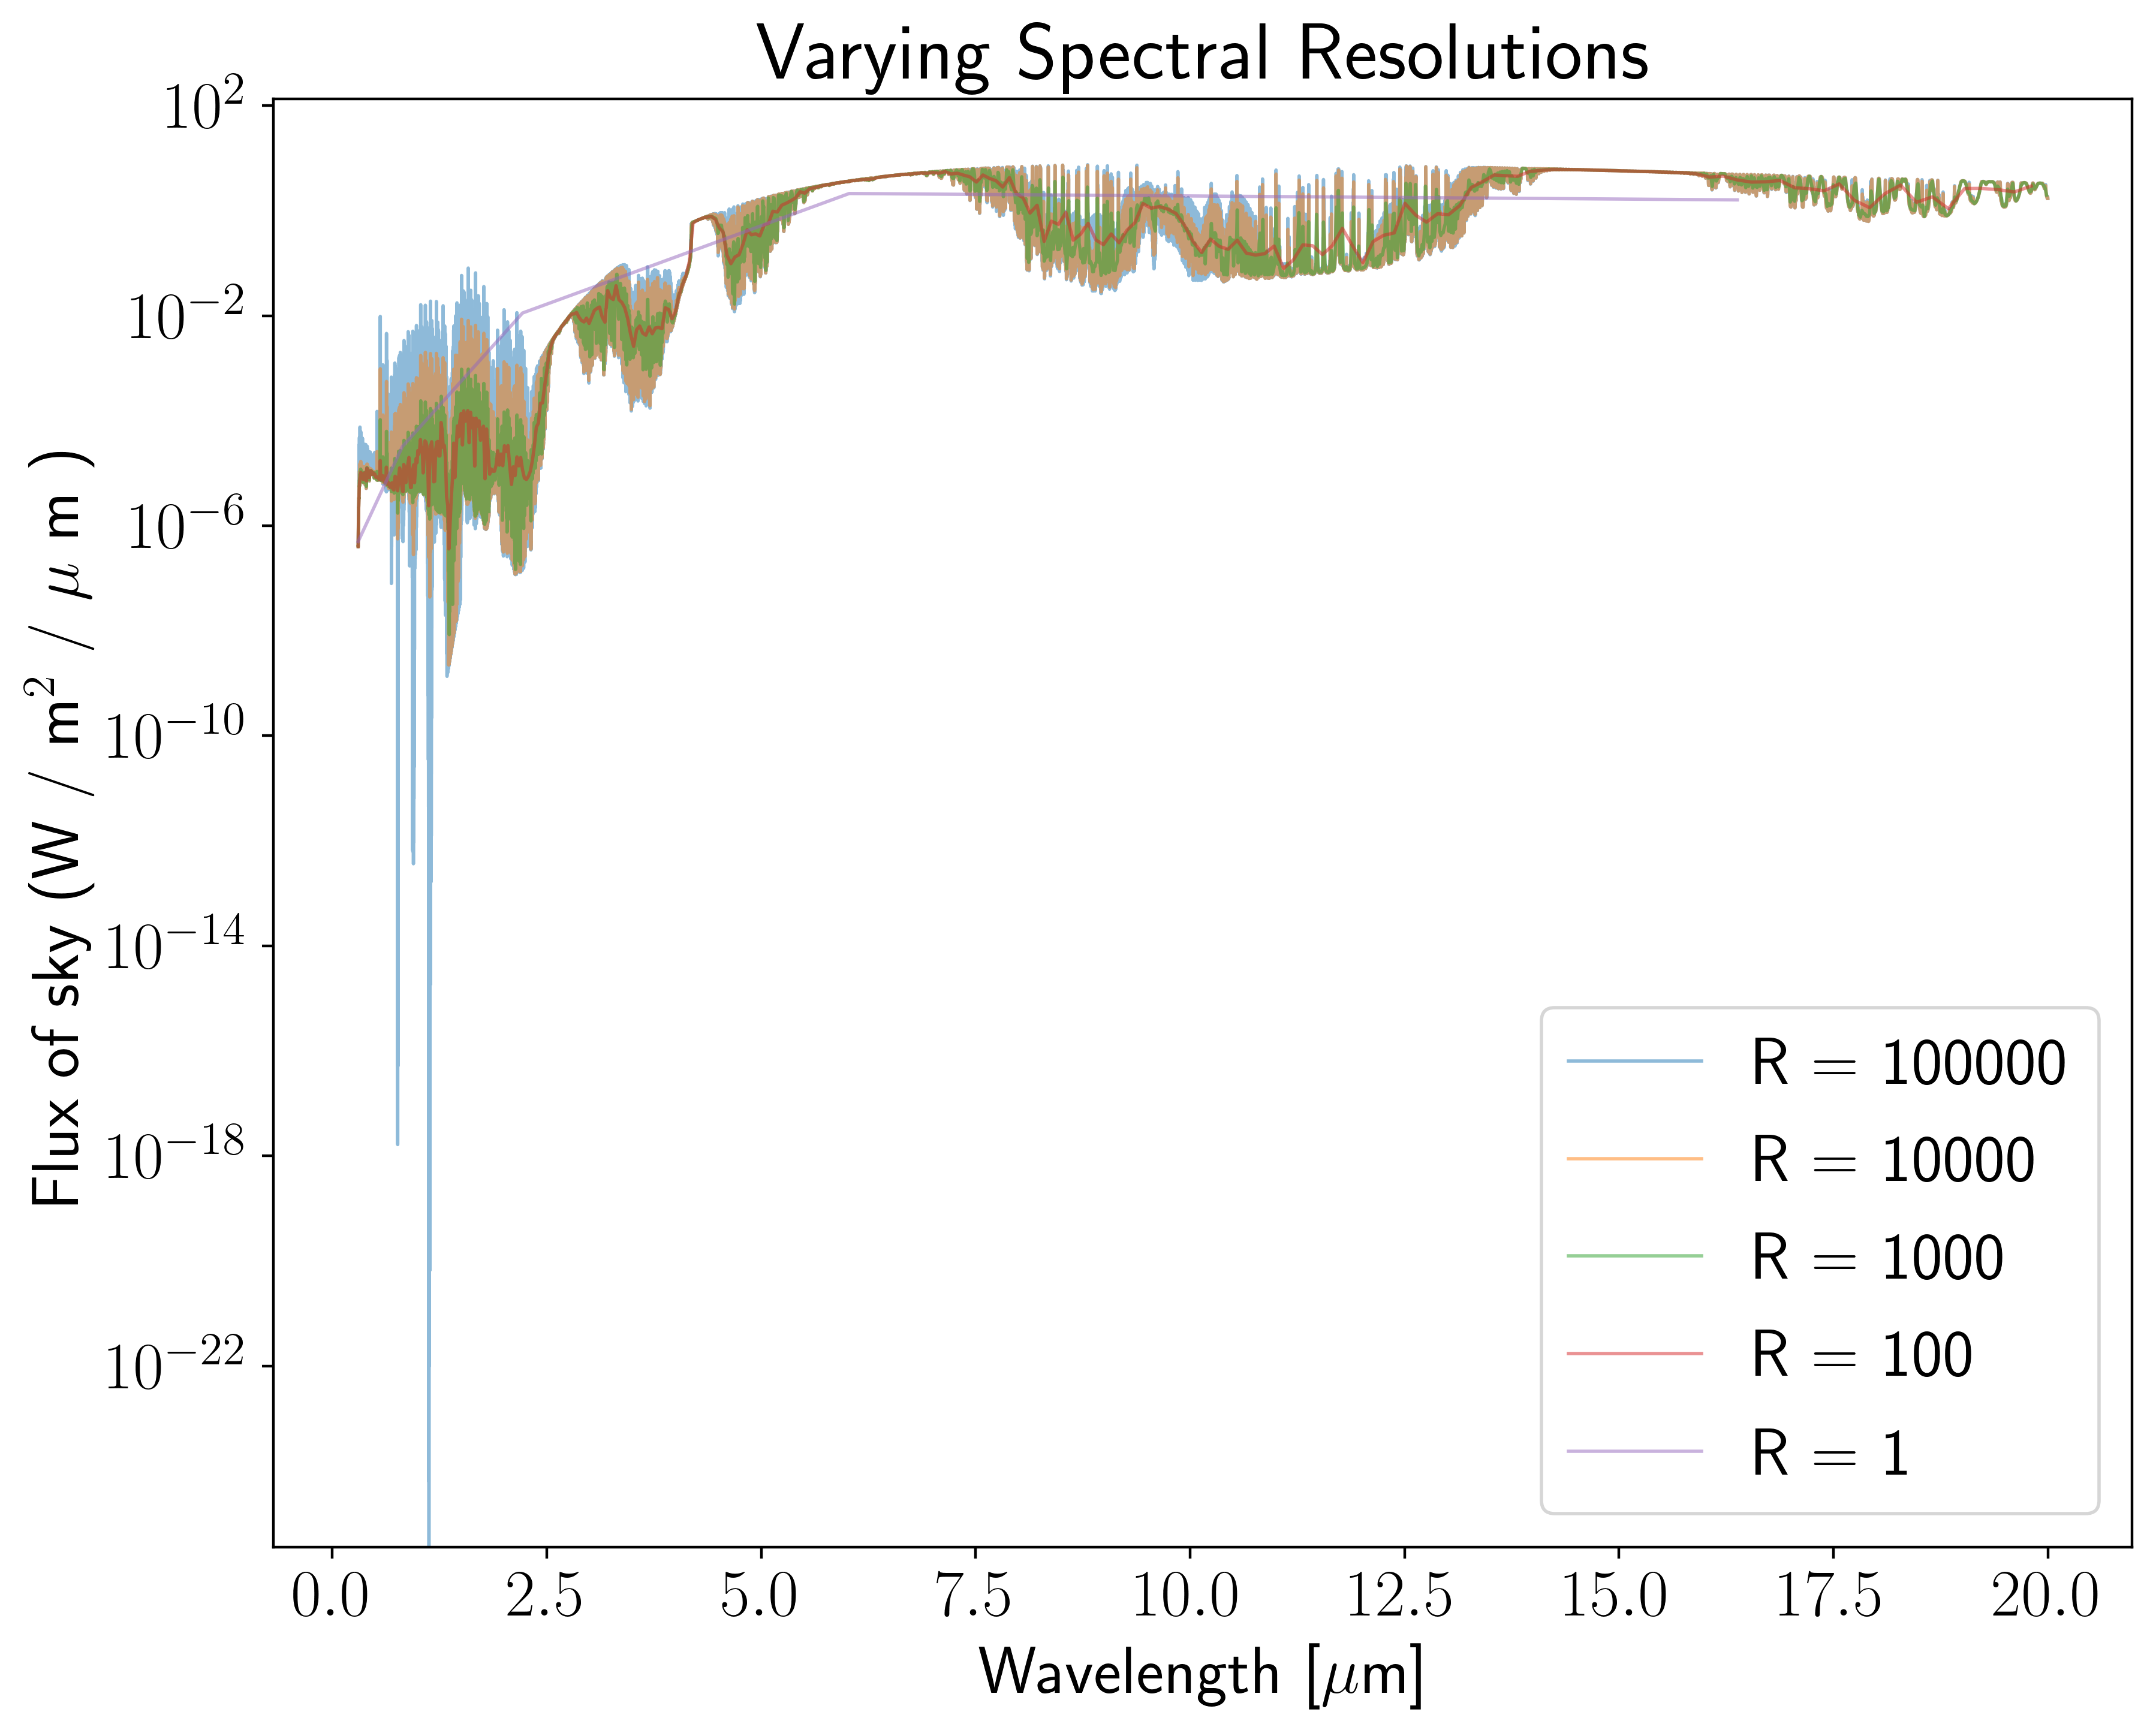

In [7]:
resolutions_to_run = [100000, 10000, 1000, 100, 1]

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for R in resolutions_to_run:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = R
    skyflux.wmin = 300
    skyflux.wmax = 20000
    print('\nSpectral resolution', skyflux.wres)
    skyflux.run_skycalc('./wres_{}.fits'.format(R))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 1.0, "alpha" : 0.5, "label": "R = {}".format(R)})
ax.set_title('Varying Spectral Resolutions'.format(skyflux.wres))
ax.legend()

## Airmass
`airmass`


Airmass 1.0
Specified output file already exists. Not re-running SkyCalc.

Airmass 1.5
Specified output file already exists. Not re-running SkyCalc.

Airmass 2.0
Specified output file already exists. Not re-running SkyCalc.

Airmass 2.5
Specified output file already exists. Not re-running SkyCalc.

Airmass 3.0
Specified output file already exists. Not re-running SkyCalc.


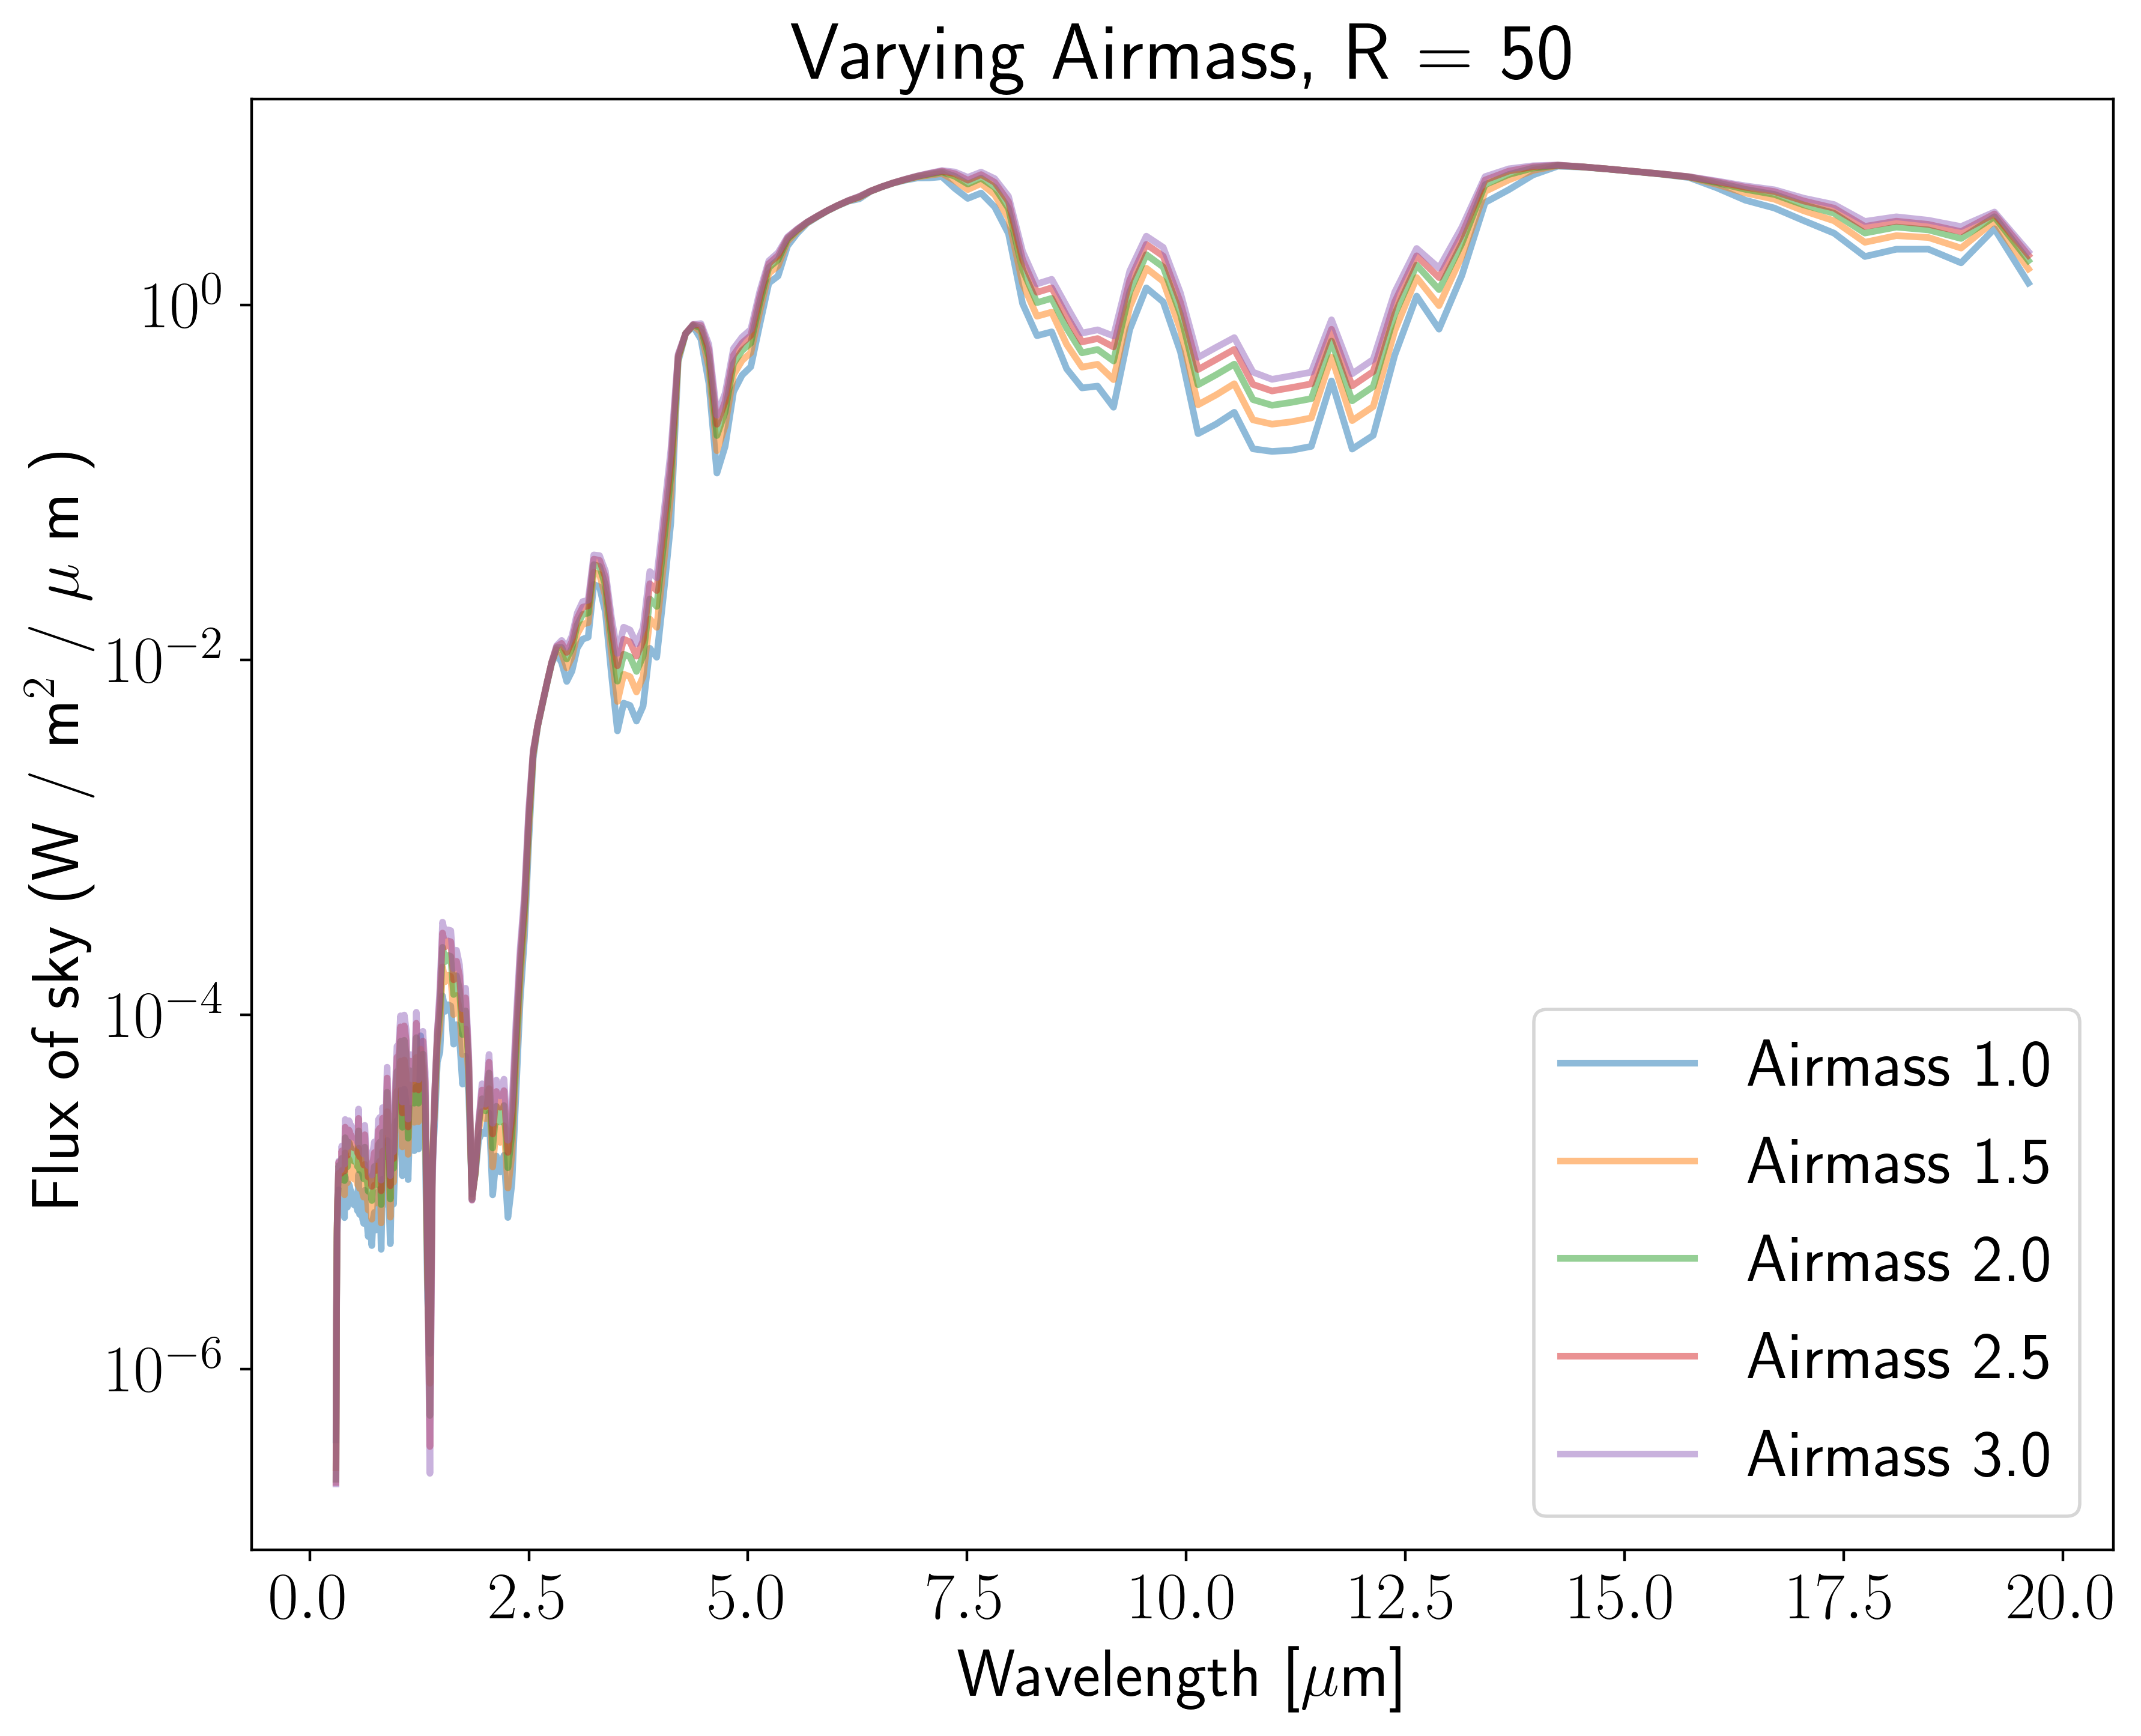

In [10]:
airmasses_to_run = [1.0, 1.5, 2.0, 2.5, 3.0]

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for airmass in airmasses_to_run:
    skyflux = cg.SkyFlux()
    skyflux.airmass = airmass
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 20000
    print('\nAirmass', skyflux.airmass)
    skyflux.run_skycalc('./airmass_{}.fits'.format(airmass))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Airmass {}".format(airmass)})
ax.set_title('Varying Airmass, R = {}'.format(skyflux.wres))
ax.legend()

## Airglow
`incl_airglow`


Include airglow? Y
Specified output file already exists. Not re-running SkyCalc.

Include airglow? N
Specified output file already exists. Not re-running SkyCalc.


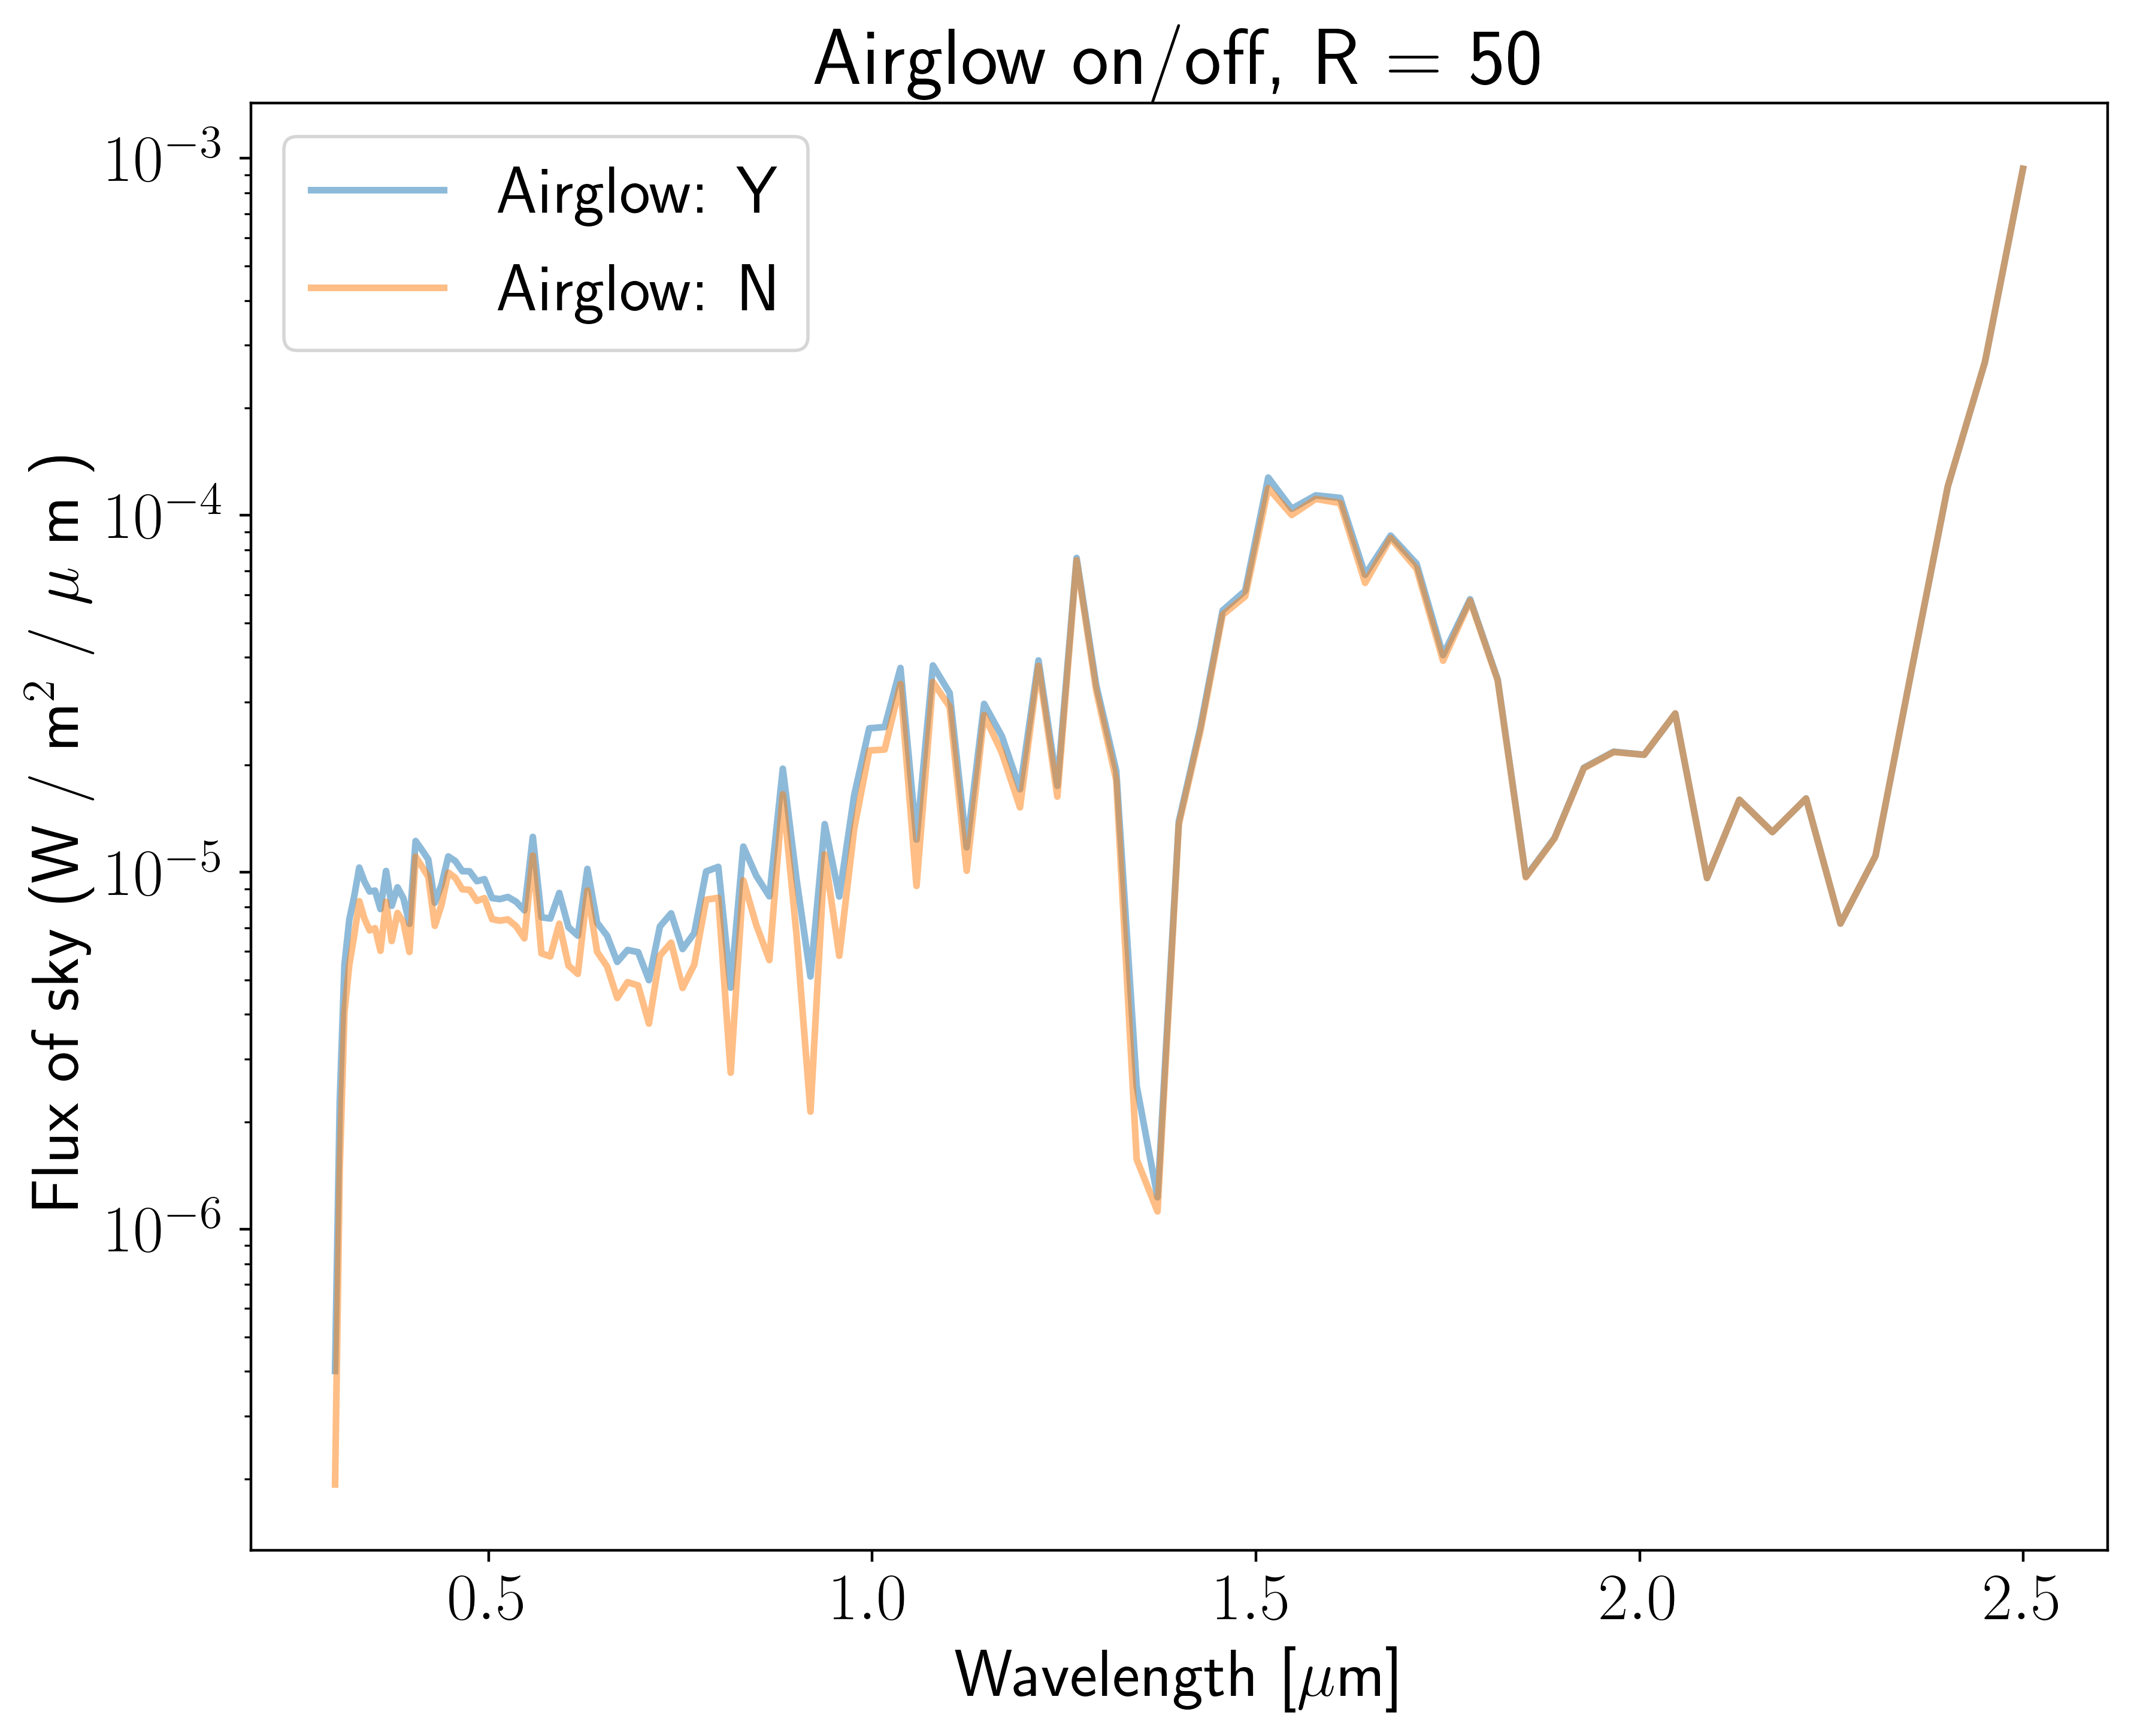

In [8]:
airglows = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for airglow in airglows:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_airglow = airglow
    print('\nInclude airglow?', skyflux.incl_airglow)
    skyflux.run_skycalc('./airglow_{}.fits'.format(airglow))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Airglow: {}".format(airglow)})
ax.set_title('Airglow on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Moonlight
`incl_moon`


Include moon? Y
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./moon_Y.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './moon_Y.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Include moon? N
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./moon_N.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './moon_N.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


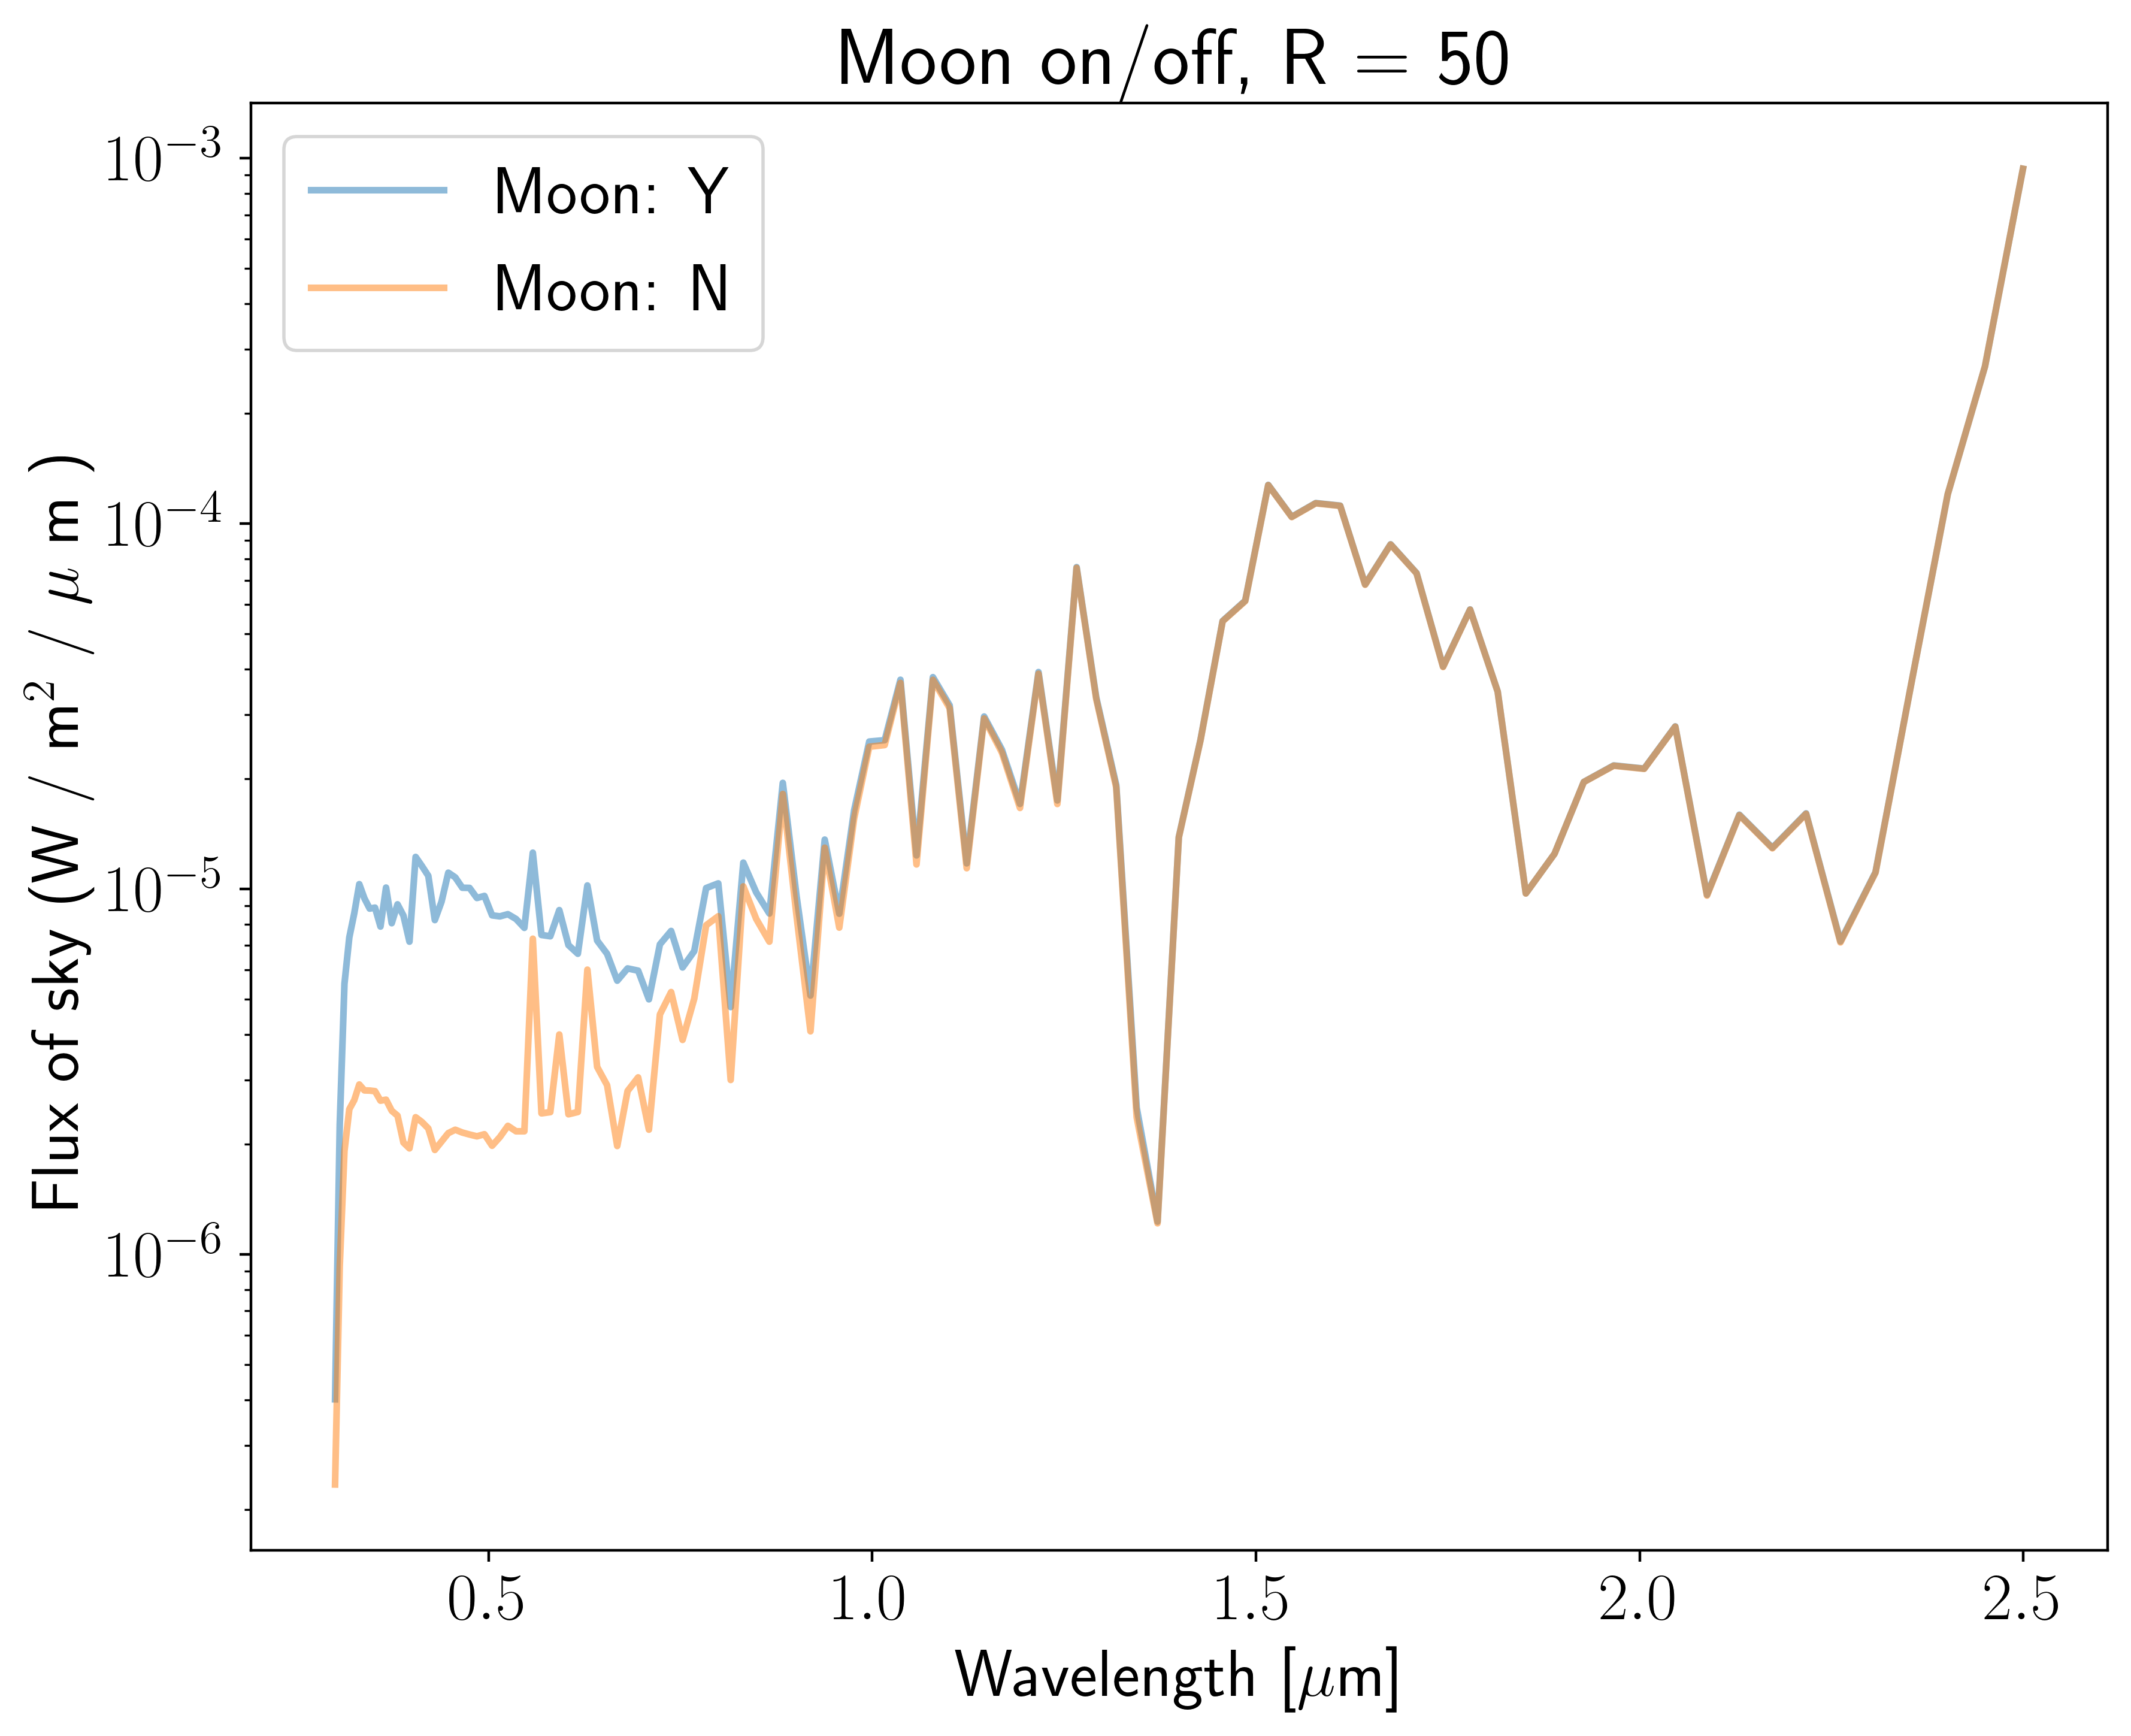

In [12]:
moonlights = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for moonlight in moonlights:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_moon = moonlight
    print('\nInclude moon?', skyflux.incl_moon)
    skyflux.run_skycalc('./moon_{}.fits'.format(moonlight))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Moon: {}".format(moonlight)})
ax.set_title('Moon on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Starlight
`incl_starlight`


Include starlight? Y
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./starlight_Y.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './starlight_Y.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Include starlight? N
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./starlight_N.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './starlight_N.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


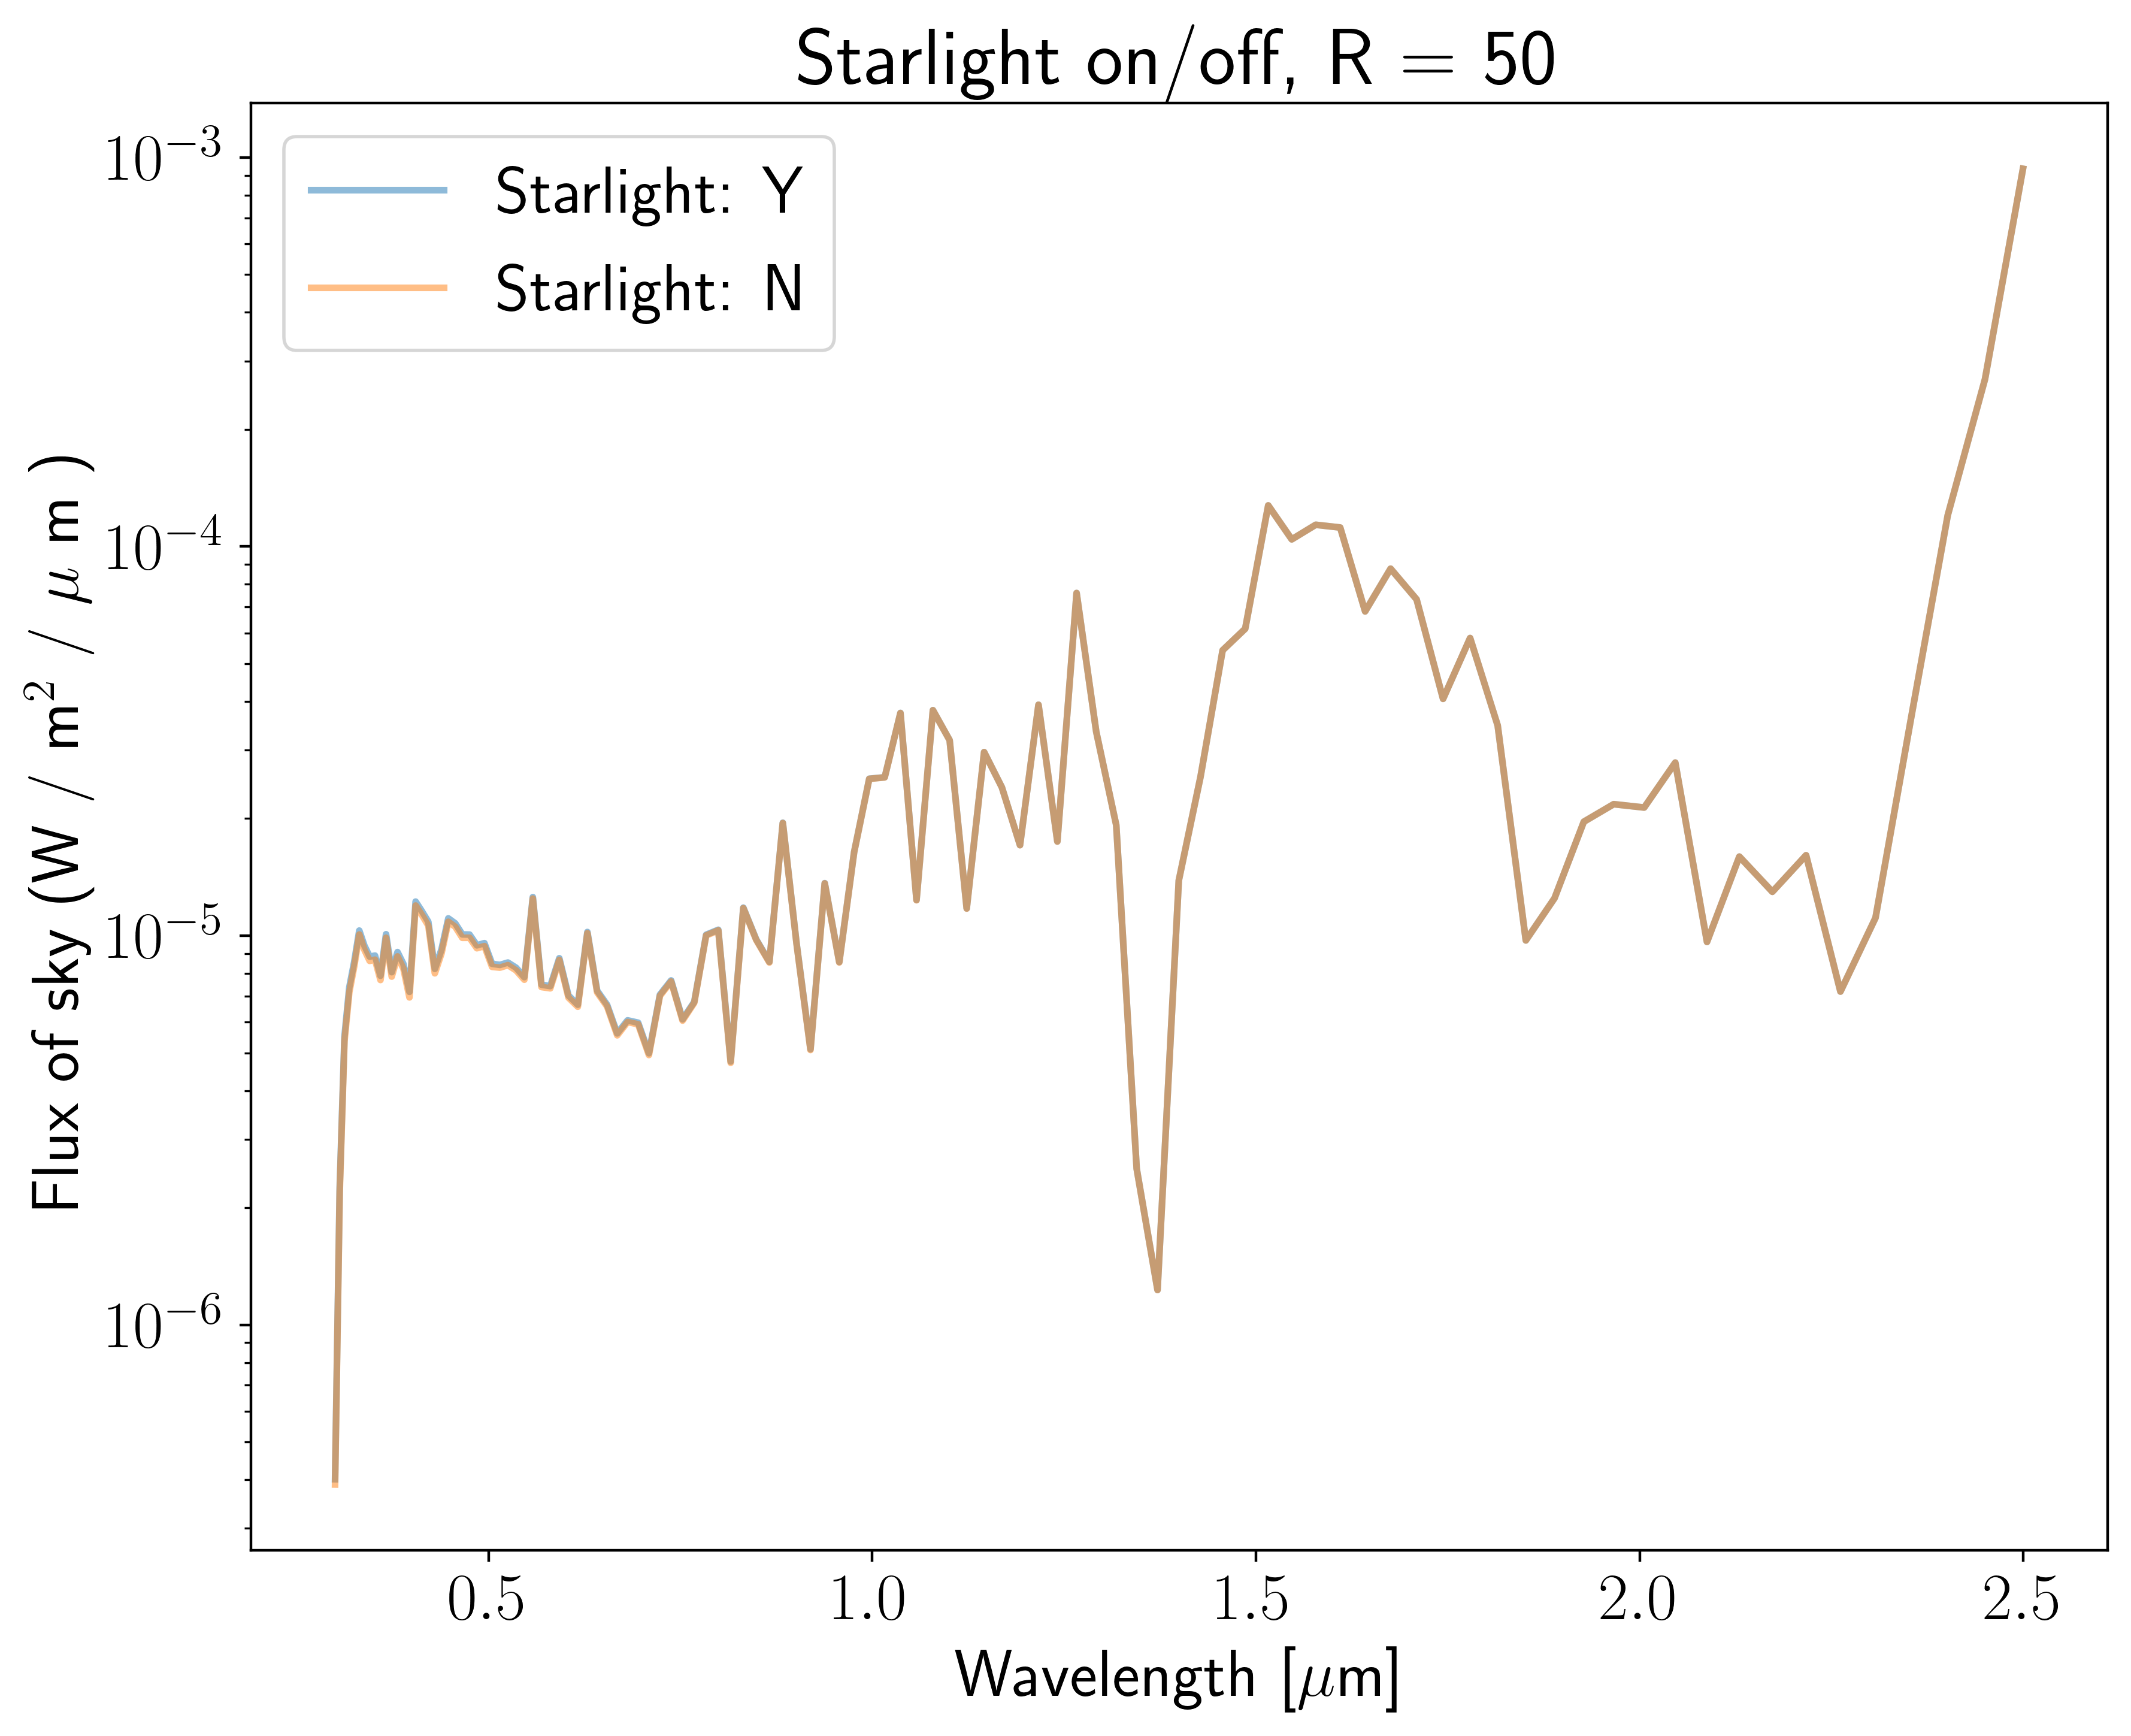

In [14]:
starlights = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for starlight in starlights:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_starlight = starlight
    print('\nInclude starlight?', skyflux.incl_starlight)
    skyflux.run_skycalc('./starlight_{}.fits'.format(starlight))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Starlight: {}".format(starlight)})
ax.set_title('Scattered Starlight on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Zodiacal Light
`incl_zodiacal`


Include zodiacal light? Y
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./zodiacalY.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './zodiacalY.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Include zodiacal light? N
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./zodiacalN.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './zodiacalN.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


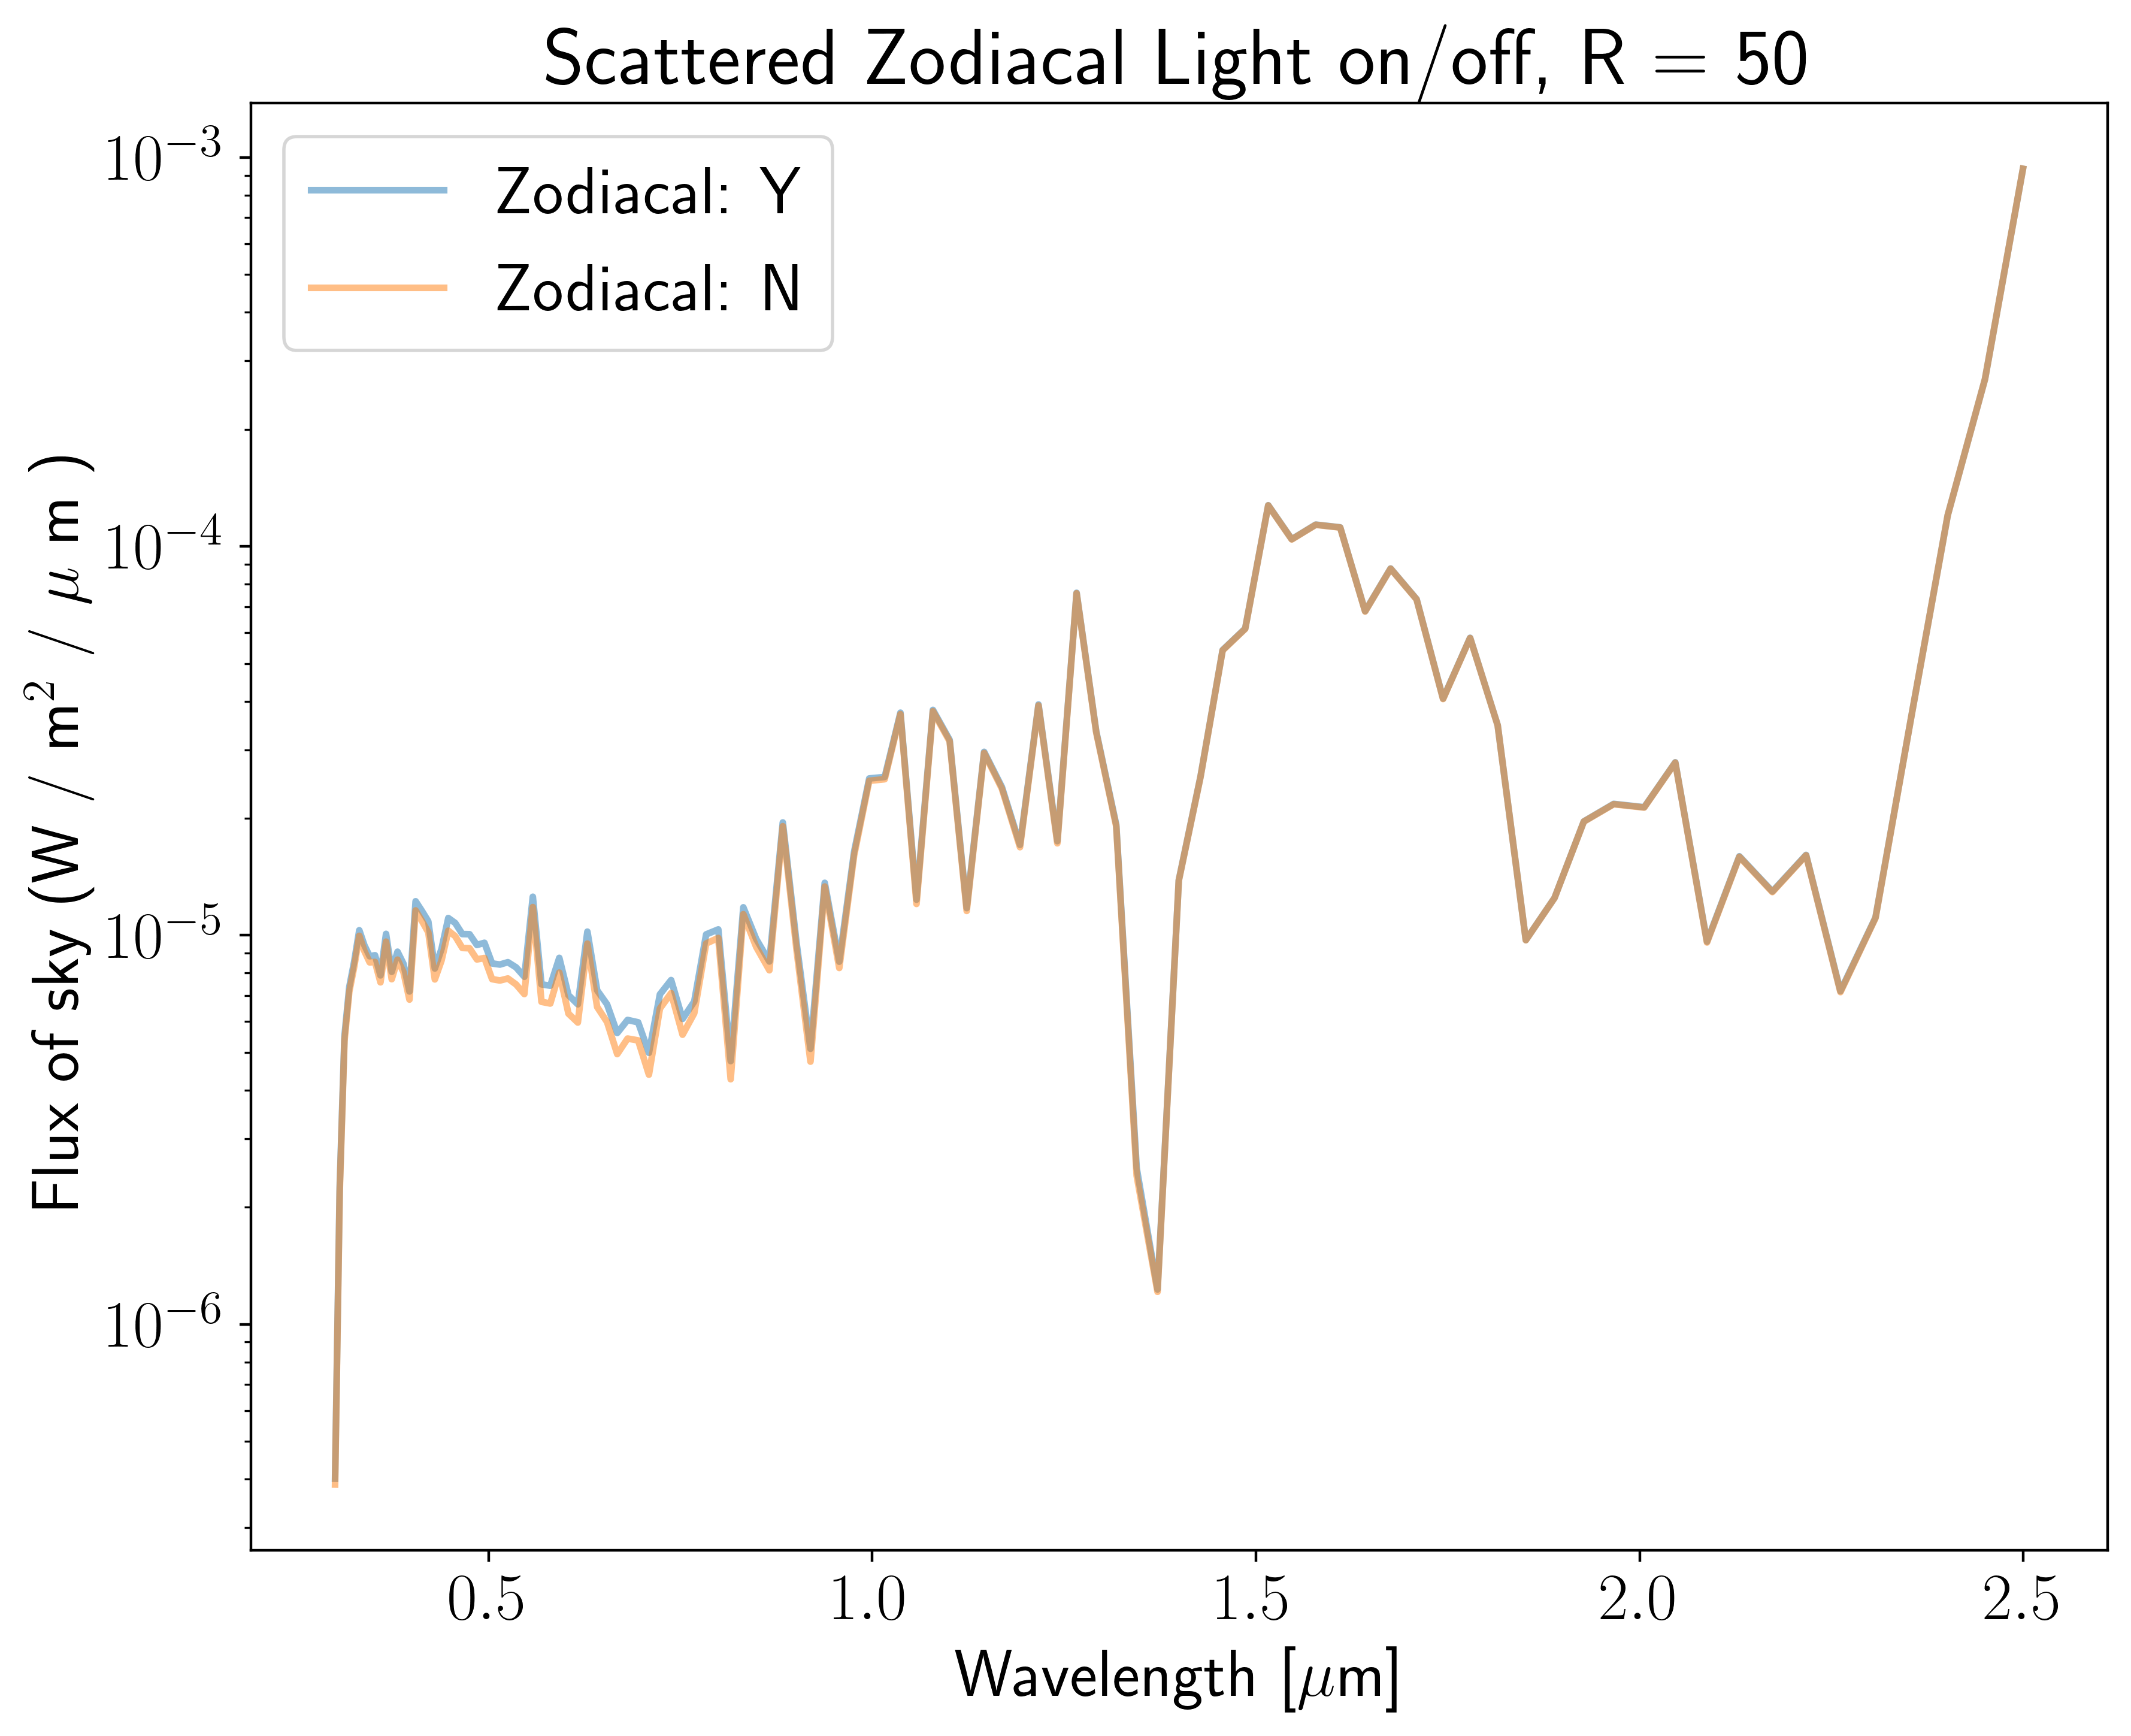

In [15]:
options = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for option in options:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_zodiacal = option
    print('\nInclude zodiacal light?', skyflux.incl_zodiacal)
    skyflux.run_skycalc('./zodiacal{}.fits'.format(option))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Zodiacal: {}".format(option)})
ax.set_title('Scattered Zodiacal Light on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Molecular Emission in Lower Atmosphere
`incl_loweratm`


Include molecular emission in lower atmosphere? Y
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./loweratm_Y.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './loweratm_Y.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Include molecular emission in lower atmosphere? N
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./loweratm_N.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './loweratm_N.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


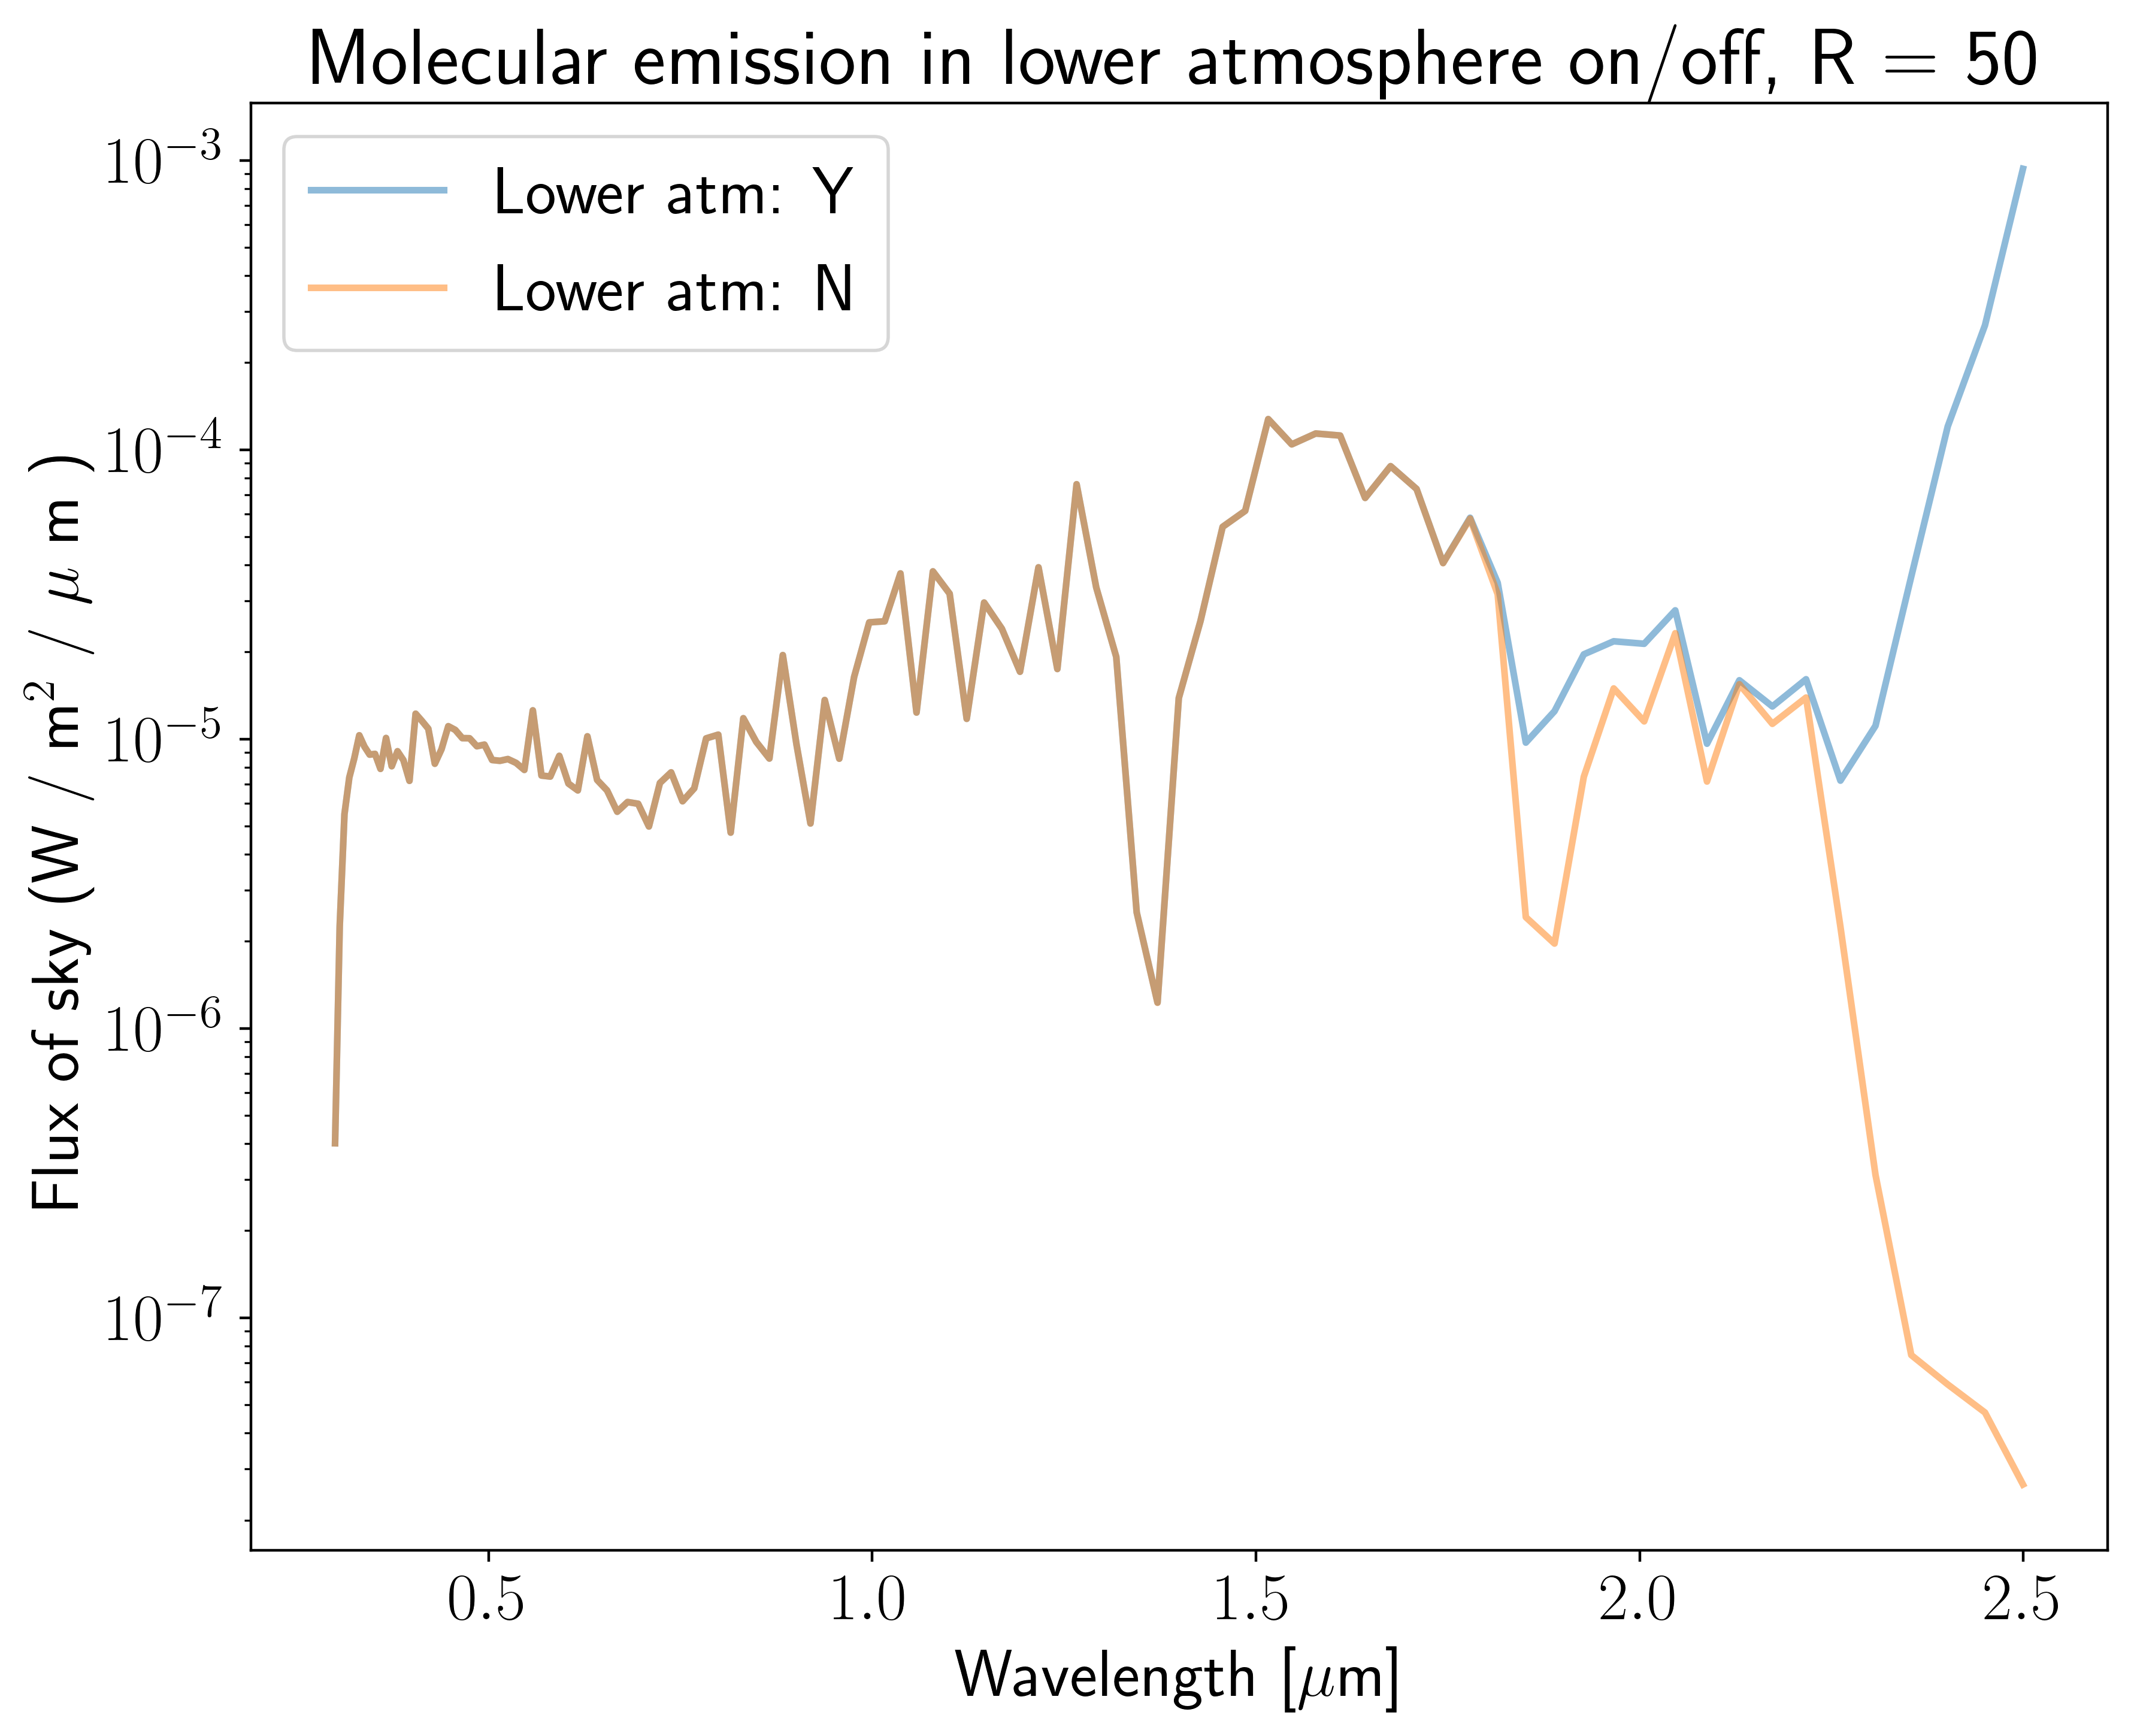

In [21]:
options = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for option in options:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_loweratm = option
    print('\nInclude molecular emission in lower atmosphere?', skyflux.incl_loweratm)
    skyflux.run_skycalc('./loweratm_{}.fits'.format(option))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Lower atm: {}".format(option)})
ax.set_title('Molecular emission in lower atmosphere on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Molecular Emission in Upper Atmosphere
`incl_upperatm`


Include molecular emission in upper atmosphere? Y
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./upperatm_Y.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './upperatm_Y.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Include molecular emission in upper atmosphere? N
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./upperatm_N.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './upperatm_N.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE


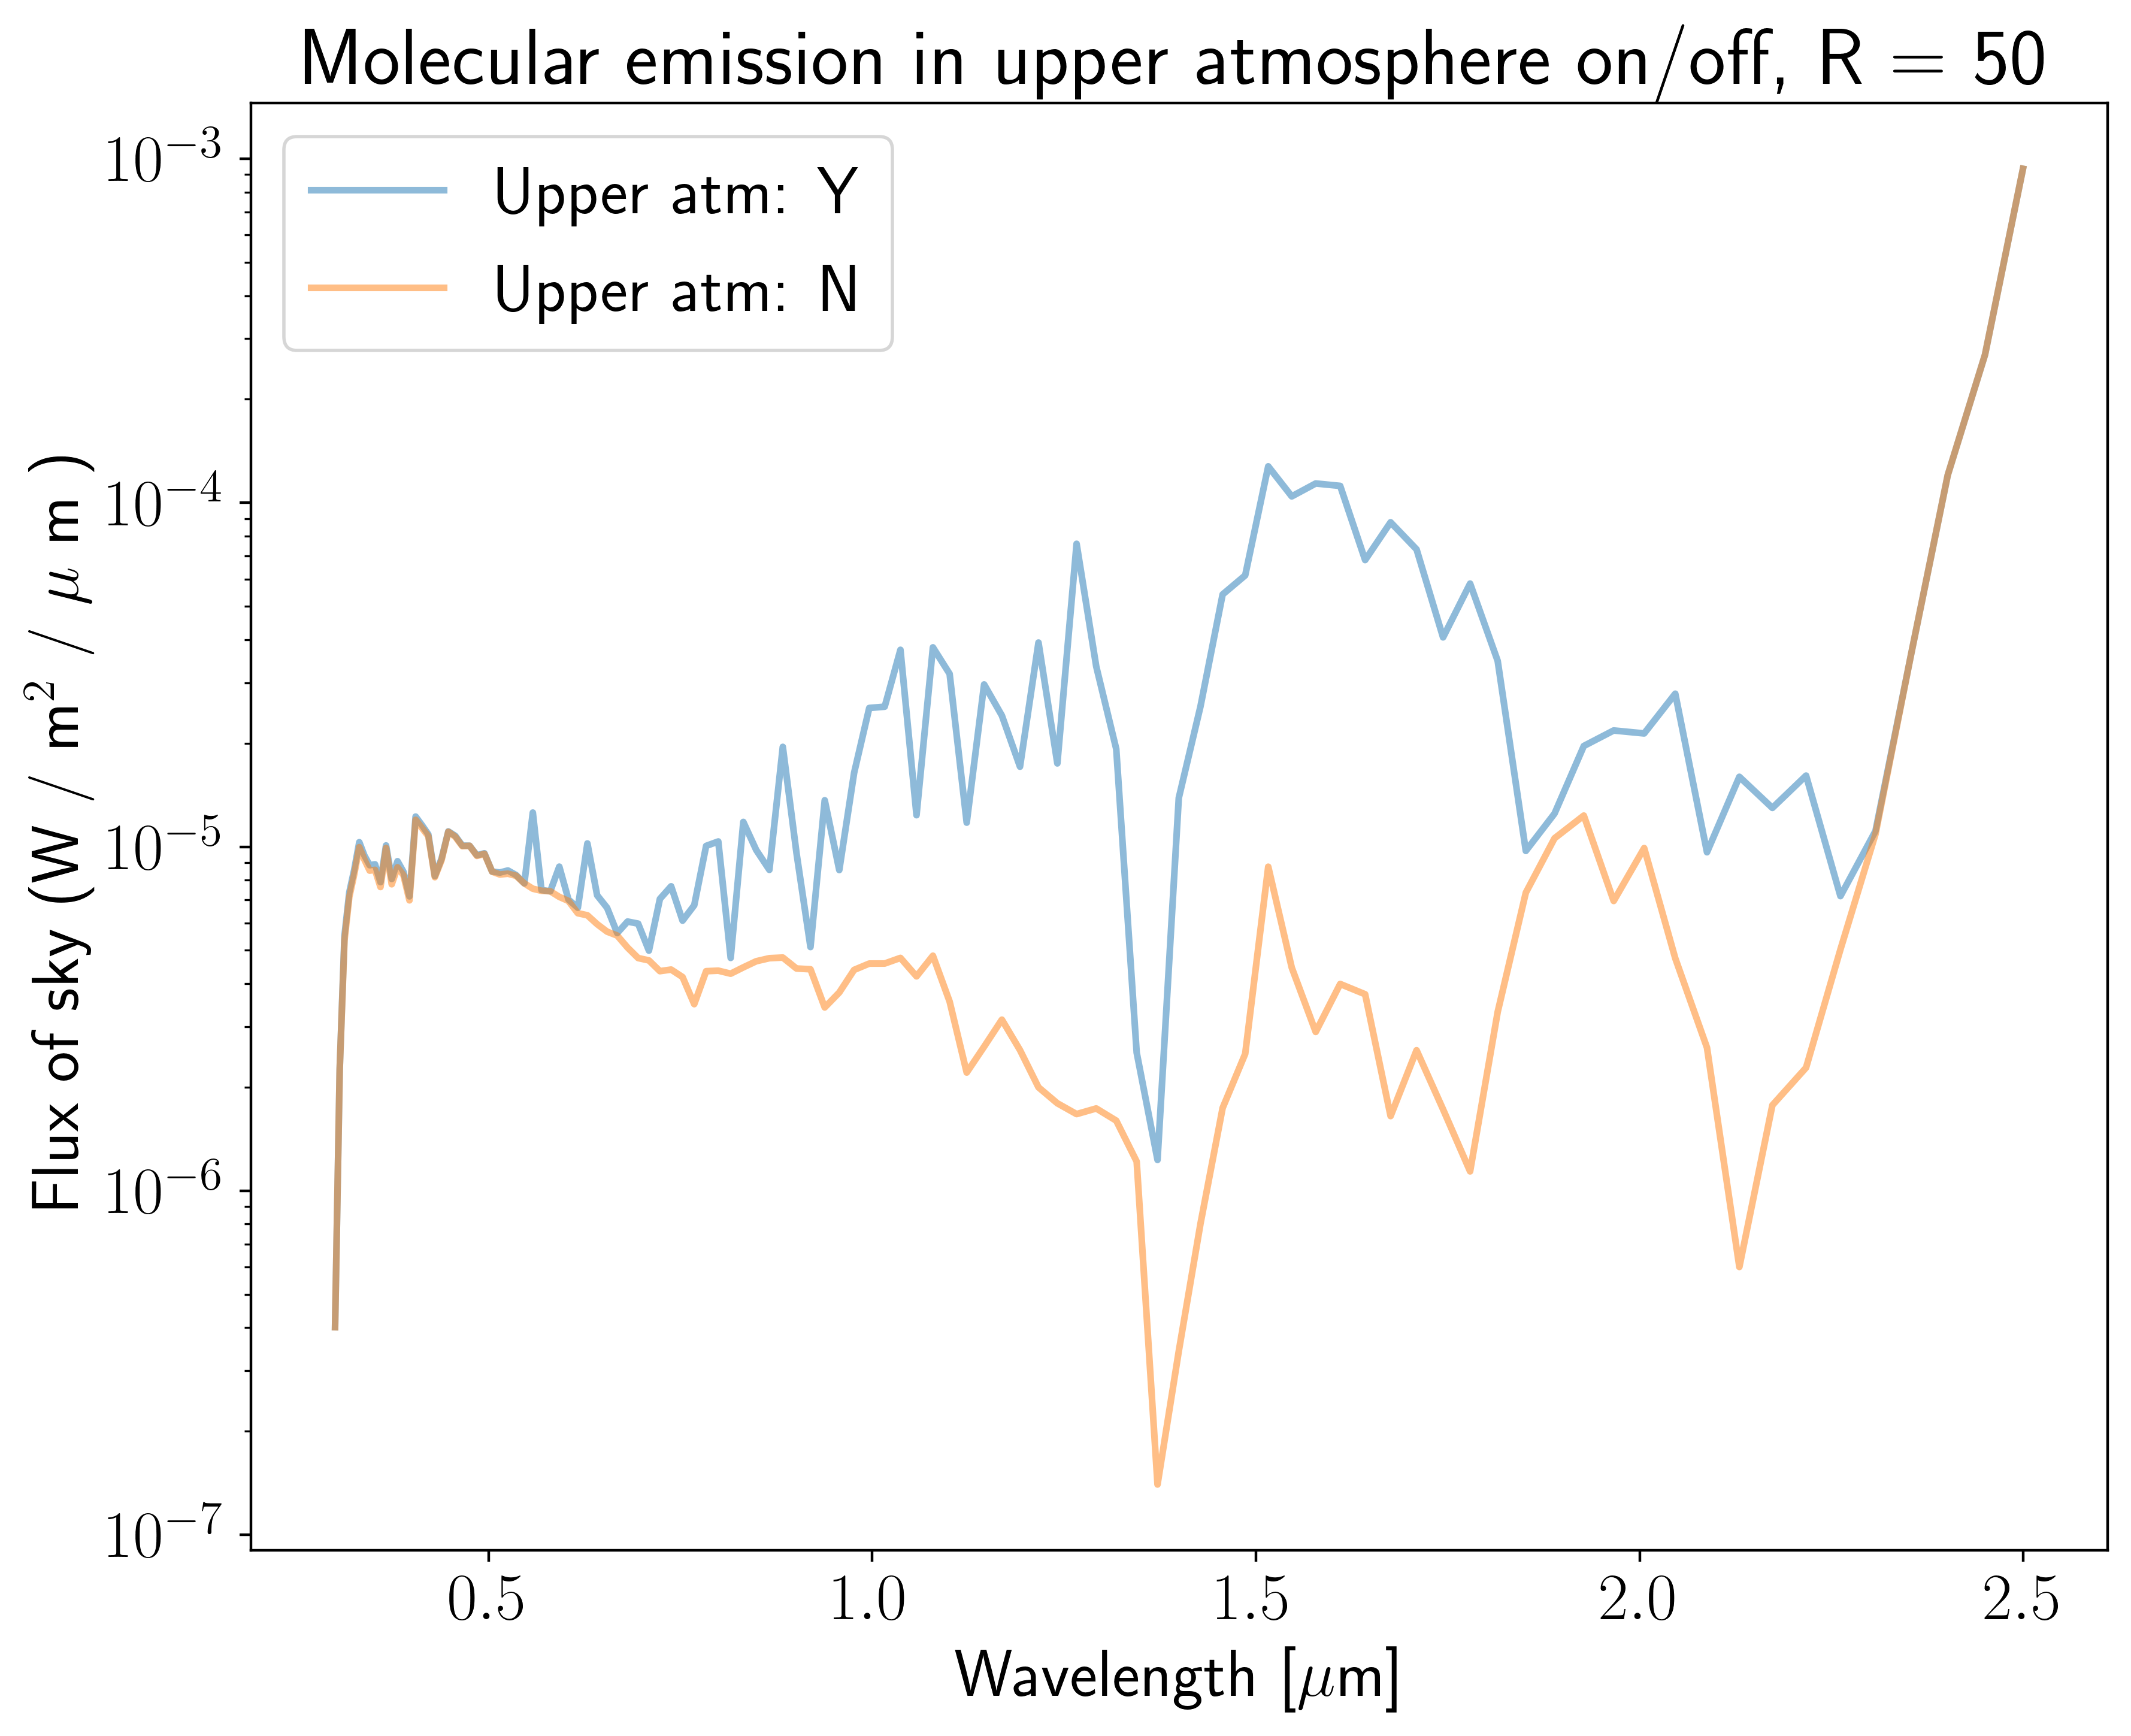

In [22]:
options = ['Y', 'N']

fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for option in options:
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.incl_upperatm = option
    print('\nInclude molecular emission in upper atmosphere?', skyflux.incl_upperatm)
    skyflux.run_skycalc('./upperatm_{}.fits'.format(option))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": "Upper atm: {}".format(option)})
ax.set_title('Molecular emission in upper atmosphere on/off, R = {}'.format(skyflux.wres))
ax.legend()

## Seasonality
`pwv_mode = "season"` 

`season`



Season: 0 Year Avg.
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./season_0.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './season_0.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Season: 1 Jan/Feb
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./season_1.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './season_1.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Season: 2 Mar/Apr
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./season_2.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './season_2.fits', '-a', './/almanac_params.txt'], returncode=0)
DONE

Season: 3 May/Jun
RUNNING: skycalc_cli -i .//skycalc_params.txt -o ./season_3.fits -a .//almanac_params.txt
CompletedProcess(args=['skycalc_cli', '-i', './/skycalc_params.txt', '-o', './season_3.fits', '-a', './/almanac_params.txt'], r

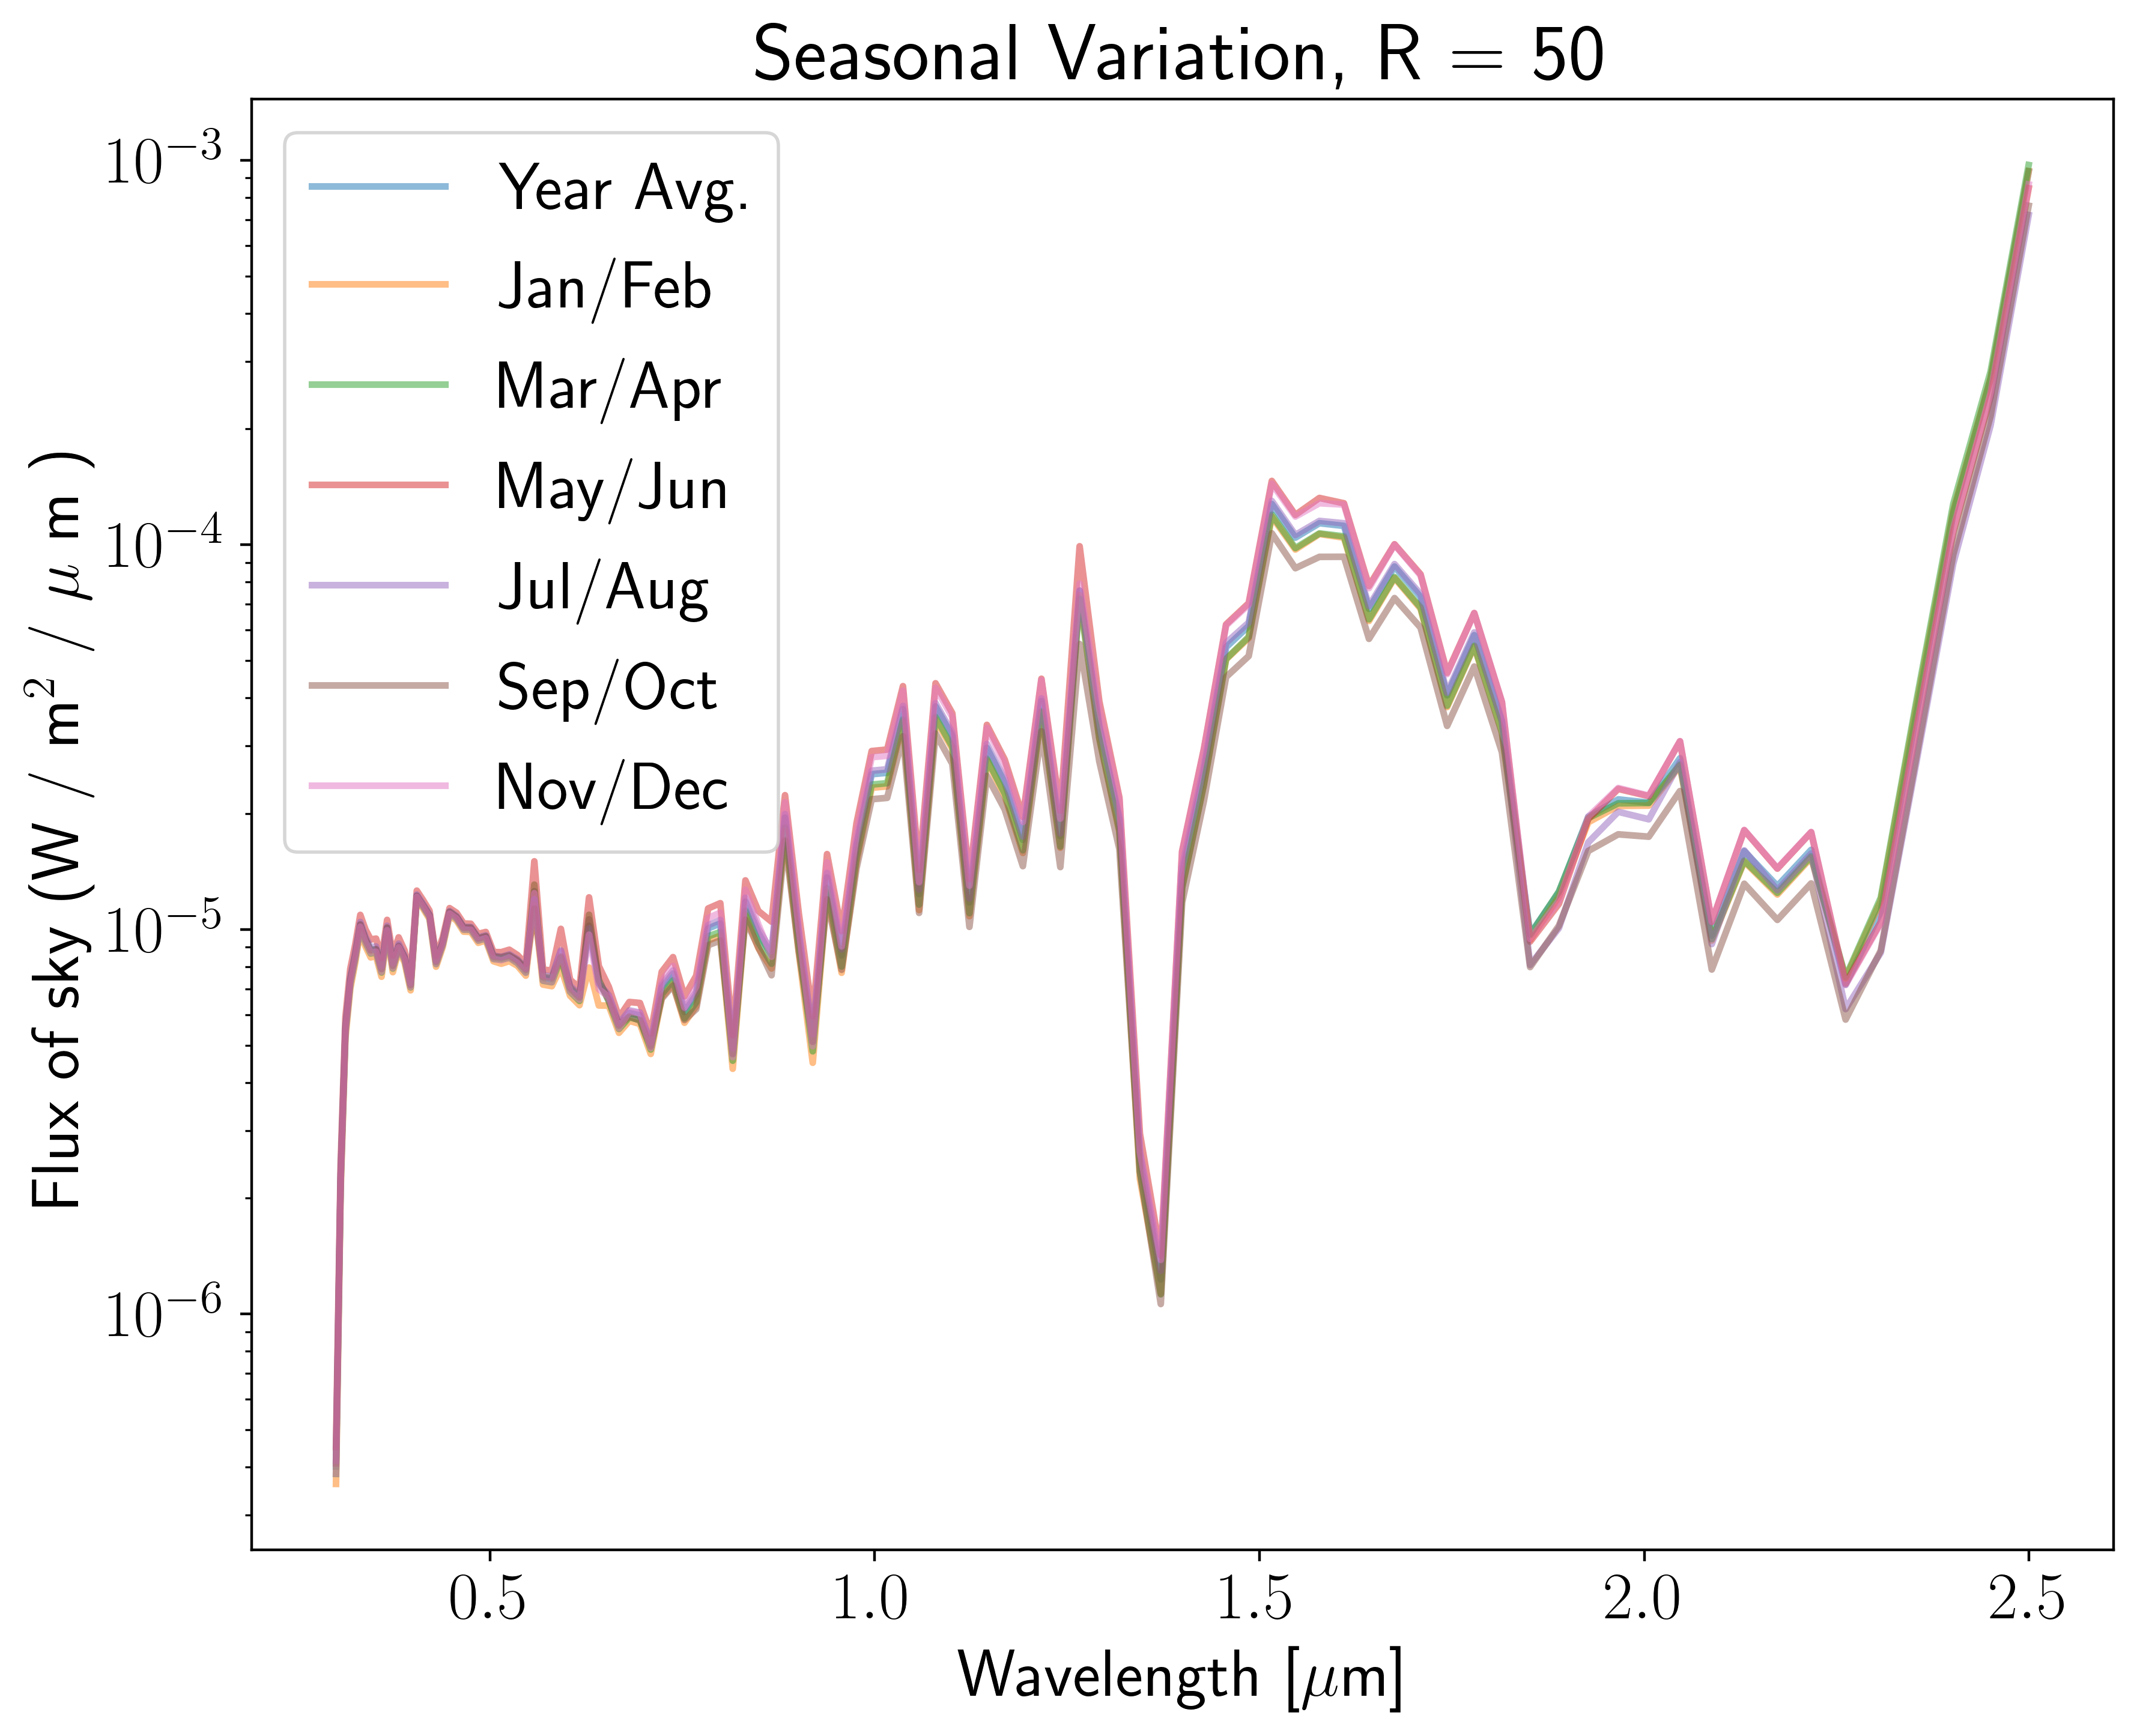

In [23]:
options = [0, 1, 2, 3, 4, 5, 6]
option_labels = ["Year Avg.", "Jan/Feb", "Mar/Apr", "May/Jun", "Jul/Aug", "Sep/Oct", "Nov/Dec"]
fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Flux of sky (W / m$^2$ / $\mu$ m )")

for n, option in enumerate(options):
    skyflux = cg.SkyFlux()
    skyflux.wgrid_mode = "fixed_spectral_resolution"
    skyflux.wres = 50
    skyflux.wmin = 300
    skyflux.wmax = 2500
    skyflux.pwv_mode = "season"
    skyflux.season = option
    print('\nSeason:', skyflux.season, option_labels[n])
    skyflux.run_skycalc('./season_{}.fits'.format(option))
    skyflux.plot_skyflux(ax0=ax, plot_kws={"lw" : 2.0, "alpha" : 0.5, "label": option_labels[n]})
ax.set_title('Seasonal Variation, R = {}'.format(skyflux.wres))
ax.legend()

## There are many others! 

In [24]:
print(skyflux)

Sky Flux: 
---------
- Airmass : 1.0
- PWV Mode : season
- Season  : 6
- Time of Night  : 0 
- Precipitable Water Vapor (PWV) [mm]  : 3.5 
- Monthly Averaged Solar Flux [sfu=0.01 MJy]  : 130.0 
- Include Scattered Moonlight?  : Y 
- Separation of Sun and Moon as seen from Earth [deg] : 90.0 
- Separation of Moon and target [deg]  : 45.0 
- Moon altitude over horizon  : 45.0 
- Moon-Earth distance (mean=1)  : 1.0 
- Include scattered starlight?  : Y 
- Include zodiacal light?  : Y 
- Heliocentric ecliptic longitude [deg]  : 135.0 
- Ecliptic latitude [deg]  : 90.0 
- Include molecular emission of lower atmosphere?  : Y 
- Include molecular emission of upper atmosphere?  : Y 
- Include upper airglow continuum?  : Y 
- Include instrumental thermal radiation?  : N 
- Instrumental temperature 1  : 0.0 
- Instrumental emmisivity 1  : 0.0 
- Instrumental temperature 2  : 0.0 
- Instrumental emmisivity 2  : 0.0 
- Instrumental temperature 3  : 0.0 
- Instrumental emmisivity 3  : 0.0 
- Calcula